<a href="https://colab.research.google.com/github/eunyeongkimm/personal_project/blob/main/%EC%98%A8%EB%9D%BC%EC%9D%B8_%EC%BB%A4%EB%A8%B8%EC%8A%A4%EB%AA%B0(%EB%8B%A4%EC%9E%87%EB%8B%A4)%EC%9D%98_2021%EB%85%84_%EC%83%81%EB%B0%98%EA%B8%B0_%EB%A7%A4%EC%B6%9C_%EB%B6%84%EC%84%9D_%EB%B0%8F_cross_selling%EC%9D%84_%ED%86%B5%ED%95%9C_%EA%B5%AC%EB%A7%A4_%EC%A6%9D%EB%8C%80_%EB%B0%A9%EC%95%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 가공 및 EDA

In [ ]:
#구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 경로 설정
import os
os.chdir('/content/drive/MyDrive/6w_commerce')
os.getcwd()

'/content/drive/MyDrive/6w_commerce'

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
#데이터 불러오기
df_commerce = pd.read_csv('online_commerce_data.csv')
df_commerce.head()

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount
0,2021059651101,68.0,9,202106072433746,2021/06/07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910
1,2018069800502,49.0,2,202105311957155,2021/05/31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000
2,2019073300103,35.0,1,202105138020462,2021/05/13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400
3,2020075283364,41.0,9,202106171444319,2021/06/17,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080
4,2020104780765,46.0,1,202106024431989,2021/06/02,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610


In [ ]:
df_commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147311 entries, 0 to 147310
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_no      147311 non-null  int64  
 1   age              147273 non-null  float64
 2   gender           147311 non-null  int64  
 3   order_no         147311 non-null  int64  
 4   order_date       147311 non-null  object 
 5   channel          147311 non-null  object 
 6   item_category    147311 non-null  object 
 7   item_code        147311 non-null  int64  
 8   item_name        147311 non-null  object 
 9   price            147311 non-null  int64  
 10  qty              147311 non-null  int64  
 11  order_amount     147311 non-null  int64  
 12  discount_amount  147311 non-null  int64  
 13  paid_amount      147311 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 15.7+ MB


In [ ]:
#age컬럼 null 비율 확인 --> 약 0.03%이므로 전체에 영향을 미치지 않을 것으로 판단하여 null값 삭제
df_commerce['age'].isnull().sum()/len(df_commerce)

0.0002579576542145529

In [ ]:
df_commerce = df_commerce.dropna(subset = ['age'])

In [ ]:
df_commerce.isnull().sum().sum()

0

In [ ]:
#gender 1-남성, 2-여성, 9-알수없음
df_commerce.groupby('gender').count()['customer_no']

gender
1    42527
2    79432
9    25314
Name: customer_no, dtype: int64

### 연령별 분석
  - 100세 이상은 이상치로 판단하여 제거
  - 다잇다 회원의 연령은 40세 이상 45세 미만이 가장 많은 정규분포를 나타내고 있음

In [ ]:
unique_ages = sorted(df_commerce['age'].unique())
# 숫자를 문자열로 변환
unique_ages_str = [str(age) for age in unique_ages]
# 문자열 리스트를 한 줄의 문자열로 결합하여 출력
print(', '.join(unique_ages_str))

15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 102.0, 122.0, 143.0, 148.0, 149.0


In [ ]:
#100세 이상 비율 확인 --> 약 0.02%이므로 전체에 영향을 미치지 않을 것으로 판단하여 삭제
len(df_commerce[df_commerce['age']>=100]) / len(df_commerce)

0.0001765428829452785

In [ ]:
df_commerce = df_commerce[df_commerce['age']<100]

In [ ]:
unique_ages = sorted(df_commerce['age'].unique())
# 숫자를 문자열로 변환
unique_ages_str = [str(age) for age in unique_ages]
# 문자열 리스트를 한 줄의 문자열로 결합하여 출력
print(', '.join(unique_ages_str))

15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0


In [ ]:
#연령을 5간격으로 그룹화
df_commerce['age_group'] = pd.cut(df_commerce['age'], bins=range(15,105,5), right = False)

<ipython-input-15-fbe714f08e9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commerce['age_group'] = pd.cut(df_commerce['age'], bins=range(15,105,5), right = False)


In [ ]:
df_commerce['age_group'].unique()

[[65, 70), [45, 50), [35, 40), [40, 45), [30, 35), ..., [75, 80), [80, 85), [85, 90), [90, 95), [95, 100)]
Length: 17
Categories (17, interval[int64, left]): [[15, 20) < [20, 25) < [25, 30) < [30, 35) ... [80, 85) <
                                         [85, 90) < [90, 95) < [95, 100)]

<Axes: xlabel='age_group', ylabel='count'>

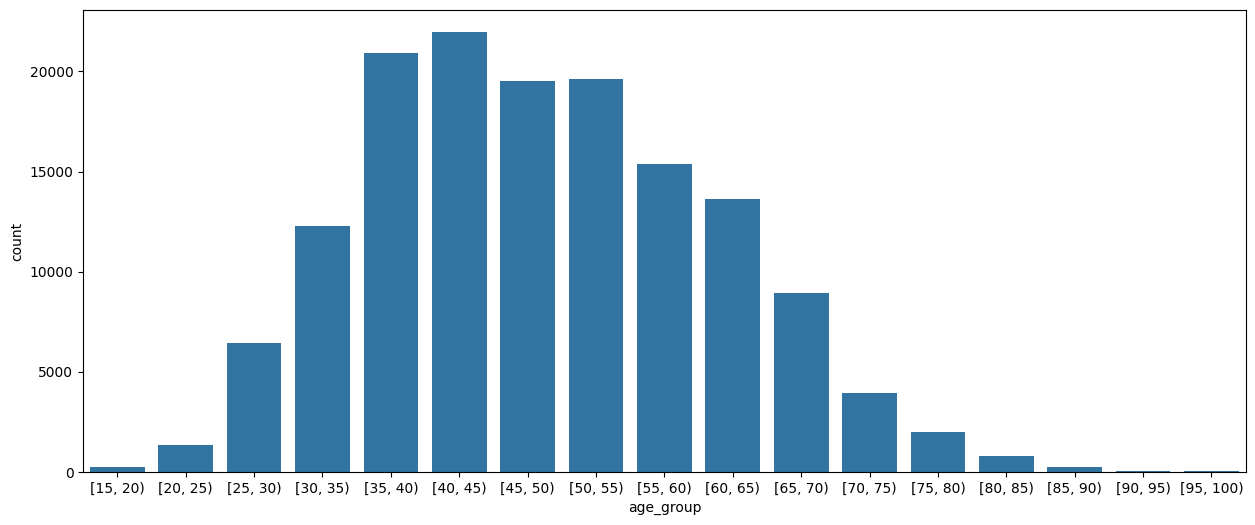

In [ ]:
plt.figure(figsize = (15,6))
sns.countplot(data = df_commerce, x = 'age_group')

### 채널별 분석
 - TV채널의 주문수가 더 적으나, 매출액은 더 높다. (TV 채널의 주문 단가가 더 높다)

In [ ]:
df_commerce['channel'].unique()

array(['TV', 'Mobile'], dtype=object)

<Axes: xlabel='channel', ylabel='count'>

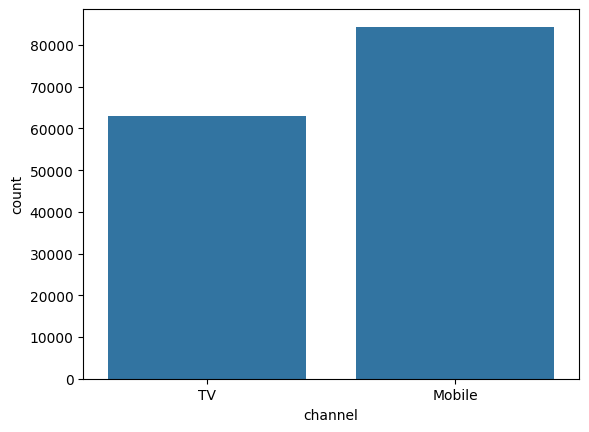

In [ ]:
#채널별 주문수
sns.countplot(data = df_commerce, x = 'channel')

<Axes: xlabel='channel', ylabel='paid_amount'>

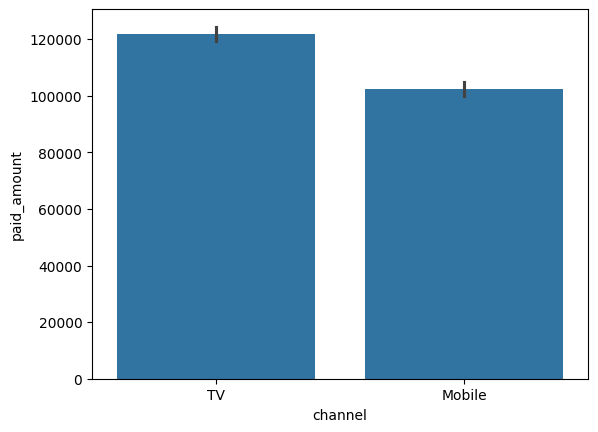

In [ ]:
#채널별 매출액
sns.barplot(data = df_commerce, x = 'channel', y = 'paid_amount')

### 주문일자별 분석
 - 다잇다의 주문일자별 매출액 분석 결과, 특이점들을 제외하고 2021년 1월부터 6월까지의 매출액은 대체로 일정함

In [ ]:
print(df_commerce['order_date'].min())
print(df_commerce['order_date'].max())


2021/01/01
2021/06/24


In [ ]:
# / --> - 로 변경
df_commerce['order_date'] = df_commerce['order_date'].str.replace('/', '-')

# datetime 형식으로 변경
df_commerce['order_date'] = pd.to_datetime(df_commerce['order_date'], format = '%Y-%m-%d')

In [ ]:
#yyyy-mm 컬럼 생성
df_commerce['order_year_month'] = df_commerce['order_date'].dt.to_period('M')

<ipython-input-21-bc8b07e67ea8>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_commerce, x='order_date', y='paid_amount', ci = None)


<Axes: xlabel='order_date', ylabel='paid_amount'>

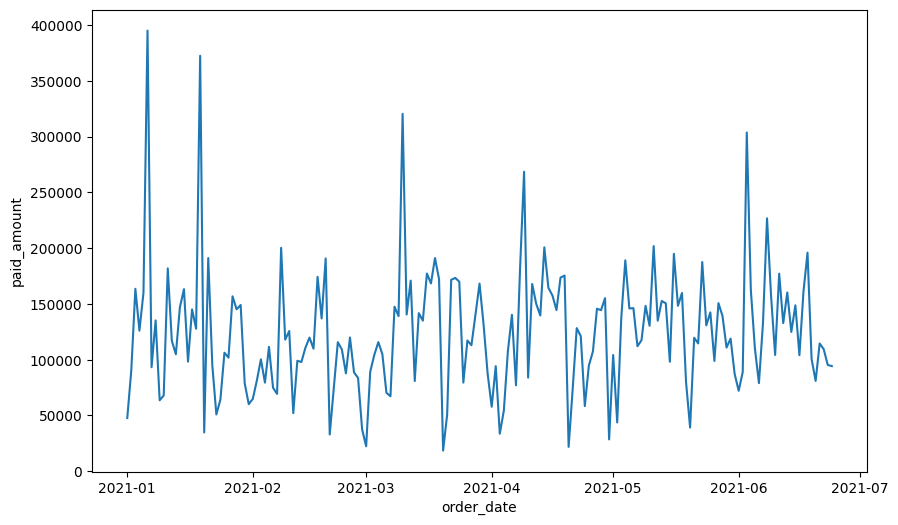

In [ ]:


plt.figure(figsize = (10,6))
sns.lineplot(data=df_commerce, x='order_date', y='paid_amount', ci = None)


<Axes: xlabel='order_year_month', ylabel='paid_amount'>

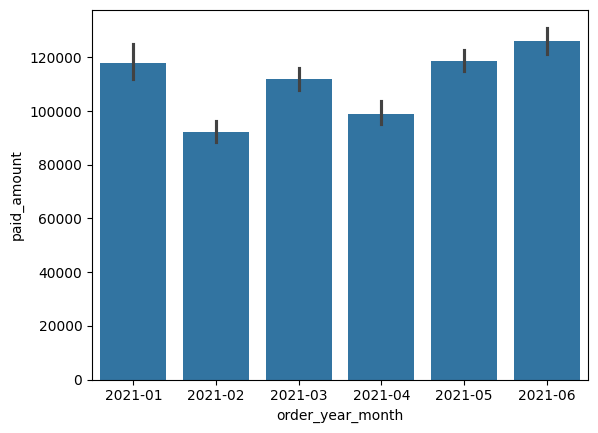

In [ ]:
#월별 매출액 평균
sns.barplot(data = df_commerce.sort_values(by = 'order_year_month'), x = 'order_year_month', y = 'paid_amount')

### 월별 매출의 유의적 차이 분석
 - 처음에 anova 분석을 수행하였으나, 정규성과 등분산성을 만족하지 않는 것으로 나와 Kruskal-Wallis H 테스트로 유의적 차이 검증
 - 참고자료 : https://medistat.tistory.com/86

In [ ]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [ ]:
#월별 매출에 유의적 차이가 있을까?

# order_year_month의 고유값 가져오기
unique_values = df_commerce['order_year_month'].unique()

# 고유값마다 그룹을 만들고 해당 그룹에 속하는 데이터를 리스트에 저장
group_data = []
for value in unique_values:
    group_data.append(df_commerce[df_commerce['order_year_month'] == value]['paid_amount'])

# ANOVA 분석
f_statistic, p_value = f_oneway(*group_data)

# p-value 출력
print(f'{p_value:.4f}')


0.0000


    - anova 전제조건 1 - 정규성

In [ ]:
from scipy.stats import shapiro

# 각 그룹에 대해 Shapiro-Wilk 테스트 수행
for i, data in enumerate(group_data):
    stat, p = shapiro(data)
    print(f'Group {i+1}: Statistics={stat:.3f}, p-value={p:.3f}')
    # p-value 해석
    if p > 0.05:
        print("정규 분포를 따른다고 가정할 수 있음.")
    else:
        print("정규 분포를 따르지 않는다고 가정할 수 있음.")


Group 1: Statistics=0.307, p-value=0.000
정규 분포를 따르지 않는다고 가정할 수 있음.
Group 2: Statistics=0.343, p-value=0.000
정규 분포를 따르지 않는다고 가정할 수 있음.
Group 3: Statistics=0.284, p-value=0.000
정규 분포를 따르지 않는다고 가정할 수 있음.
Group 4: Statistics=0.212, p-value=0.000
정규 분포를 따르지 않는다고 가정할 수 있음.
Group 5: Statistics=0.308, p-value=0.000
정규 분포를 따르지 않는다고 가정할 수 있음.
Group 6: Statistics=0.241, p-value=0.000
정규 분포를 따르지 않는다고 가정할 수 있음.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



      - anova 전제조건 2 - 등분산성

In [ ]:
from scipy.stats import levene

stat, p = levene(*group_data)
print(f'Levene’s Test: Statistics={stat:.3f}, p-value={p:.3f}')
# p-value 해석
if p > 0.05:
    print("등분산성을 가정할 수 있음.")
else:
    print("등분산성을 가정할 수 없음.")


Levene’s Test: Statistics=27.419, p-value=0.000
등분산성을 가정할 수 없음.


     - 정규성과 등분산성을 만족하지 않아, Kruskal-Wallis H 테스트로 유의적 차이 검증

In [ ]:
from scipy.stats import kruskal

# Kruskal-Wallis H 테스트 수행
stat, p = kruskal(*group_data)
print(f'Kruskal-Wallis H Test: Statistics={stat:.3f}, p-value={p:.3f}')

# p-value 해석
if p > 0.05:
    print("그룹 간 중앙값에 유의미한 차이가 없음.")
else:
    print("적어도 하나의 그룹 간 중앙값에 유의미한 차이가 있음.")


Kruskal-Wallis H Test: Statistics=2564.433, p-value=0.000
적어도 하나의 그룹 간 중앙값에 유의미한 차이가 있음.


### 할인금액 - 매출액 상관관계 분석

* 할인 금액에 따라 매출액의 변동이 있을까?
  - 대체로 할인 금액 동향과 매출액 동향이 유사하게 나타나고 있음
  - 상관계수 분석 결과, 할인 금액과 매출액의 상관계수는 0.72로 양의 상관관계가 있는 것으로 나타남
  - 특히, 상품권, 패션잡화, 키즈/유아동, 생활가전, 주방가전, 뷰티 카테고리의 경우 상관계수가 0.8 이상으로, 매출액 증진을 위해 해당 카테고리의 적극적 할인 정책을 고려할 필요가 있음

<ipython-input-47-c9f0657090d4>:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-47-c9f0657090d4>:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




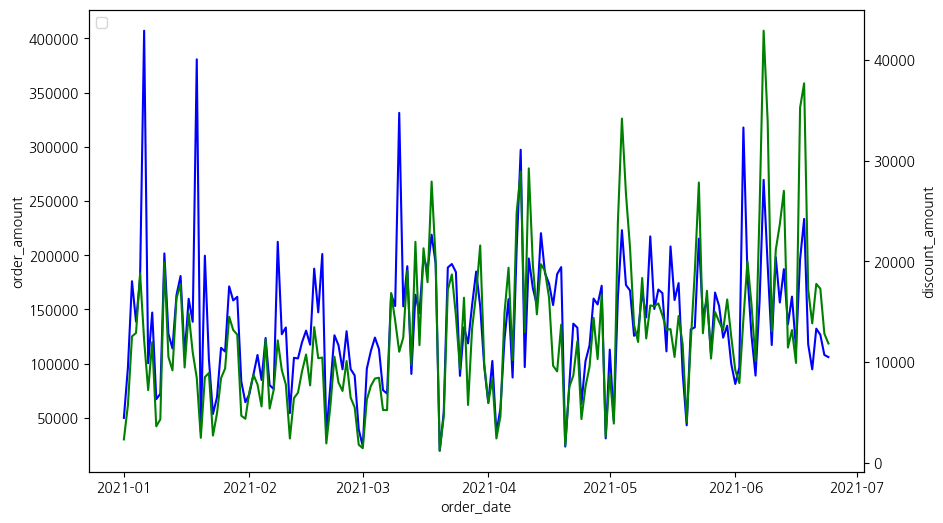

In [ ]:
#월별 할인금액 및 매출액

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

sns.lineplot(data = df_commerce, x = 'order_date', y = 'order_amount', ci = None, ax = ax1, color = 'blue')
sns.lineplot(data = df_commerce, x = 'order_date', y = 'discount_amount', ci = None, ax = ax2, color = 'green')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

In [ ]:
#상관관계분석

correlation = df_commerce[['order_amount', 'discount_amount']].corr()
print(correlation)


                 order_amount  discount_amount
order_amount         1.000000         0.721741
discount_amount      0.721741         1.000000


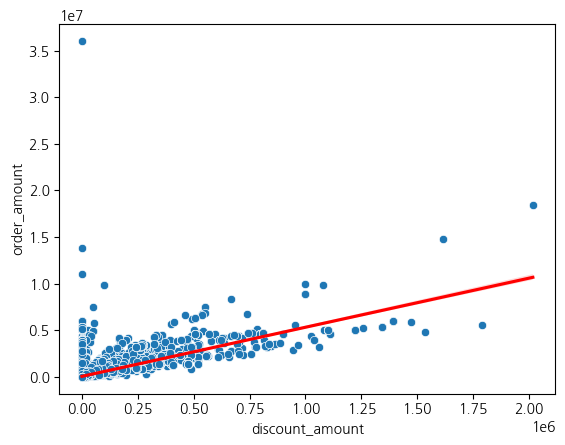

In [ ]:

sns.scatterplot(data=df_commerce, x='discount_amount', y='order_amount')
sns.regplot(data=df_commerce, x='discount_amount', y='order_amount', scatter=False, color='red')
plt.show()


In [ ]:
#할인에 민감한 카테고리 찾기
#카테고리별 매출액 - 할인금액 상관계수분석

correlation_by_category = df_commerce.groupby('item_category').apply(
    lambda x: x[['order_amount', 'discount_amount']].corr().iloc[0, 1]
)

correlation_by_category = correlation_by_category.sort_values(ascending=False)
correlation_by_category


item_category
상품권        1.000000
패션잡화       0.986157
키즈/유아동     0.894314
생활가전       0.890664
주방가전       0.842227
뷰티         0.821221
여행         0.739691
건강식품       0.719002
대형가전       0.687358
여성의류       0.685575
레저/스포츠     0.653897
레포츠패션      0.653881
주방용품       0.637446
생활용품       0.528938
가구/인테리어    0.483755
언더웨어       0.466802
남성의류       0.376192
캐쥬얼        0.253465
침구         0.192969
반려용품       0.135110
일반식품       0.053192
dtype: float64

### 카테고리별 분석


 - 최근 레저/스포츠 카테고리의 매출이 급격히 증가하고 있으며, 세부적으로는 베개의 매출액이 가장 높았다.
 - 좀 더 상세히 살펴보면, 2021년 6월의 목/금요일에 TV채널을 통한 베개의 매출이 많이 발생했다.
 - 25세 이상 75세 이하의 다양한 연령대에서 대부분 베개의 매출이 가장 높게 나타났다.
 - item_code 관련
   - item_code가 item_name과 1:1 매칭이 아니며, 동일 item_name내에 N개의 item_code 존재한다.
   - item_code가 같을 경우 price 대체로 동일하나, 아닌 경우도 있다.
 - 베개 상품의 매출액 급등은 1구매당 30개 이상을 구매하는 대량 구매로 인한 결과이다.

In [ ]:
print(df_commerce['item_category'].unique())
print(df_commerce['item_category'].nunique())

['캐쥬얼' '레포츠패션' '뷰티' '건강식품' '일반식품' '패션잡화' '대형가전' '언더웨어' '생활가전' '여성의류'
 '레저/스포츠' '생활용품' '주방가전' '키즈/유아동' '상품권' '주방용품' '침구' '가구/인테리어' '반려용품' '남성의류'
 '여행']
21


In [ ]:
print(df_commerce['item_code'].unique())
print(df_commerce['item_code'].nunique())

[323421750 323516657 323393459 ... 321442258 322393460 322678100]
9808


In [ ]:
print(df_commerce['item_name'].unique())
print(df_commerce['item_name'].nunique())

['밴딩팬츠' '트랙수트' '기초세트' ... '라면/국수냄비' '더덕구이' '식도/중도']
1185


In [ ]:
#item_code가 item_name과 1:1 매칭이 아니며, 동일 item_name내에 N개의 item_code 존재
#item_code가 같을 경우 price 대체로 동일하나, 아닌 경우도 있음
df_commerce[df_commerce['item_name'] == '글루코사민'].sort_values(by = 'item_code')

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,age_group,order_year_month
107021,2021015482876,38.0,9,202103154848275,2021-03-15,Mobile,건강식품,320218439,글루코사민,52900,1,52900,2640,50260,"[35, 40)",2021-03
79745,2020027150342,47.0,2,202106018499043,2021-06-01,Mobile,건강식품,321513531,글루코사민,5900,1,5900,0,5900,"[45, 50)",2021-06
91467,2018069929666,41.0,1,202104205161514,2021-04-20,Mobile,건강식품,321513531,글루코사민,5900,1,5900,290,5610,"[40, 45)",2021-04
81611,2021015357096,42.0,9,202101060926925,2021-01-06,Mobile,건강식품,321765659,글루코사민,69000,1,69000,3450,65550,"[40, 45)",2021-01
131908,2020095377406,57.0,9,202104197492521,2021-04-19,Mobile,건강식품,321770279,글루코사민,249000,1,249000,24900,224100,"[55, 60)",2021-04
130652,2020017406856,45.0,1,202105067258965,2021-05-06,Mobile,건강식품,321770279,글루코사민,249000,1,249000,36100,212900,"[45, 50)",2021-05
114573,2020129788538,47.0,9,202105051890987,2021-05-05,Mobile,건강식품,321770279,글루코사민,249000,1,249000,36100,212900,"[45, 50)",2021-05
24900,2020069877088,51.0,9,202104026904617,2021-04-02,Mobile,건강식품,321770280,글루코사민,129000,1,129000,10000,119000,"[50, 55)",2021-04
27698,2020046682698,58.0,2,202104210196545,2021-04-21,Mobile,건강식품,321770280,글루코사민,129000,1,129000,18700,110300,"[55, 60)",2021-04
128378,2020092827321,73.0,1,202101148136830,2021-01-14,Mobile,건강식품,321770280,글루코사민,122000,1,122000,0,122000,"[70, 75)",2021-01


In [ ]:
df_commerce

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,age_group,order_year_month
0,2021059651101,68.0,9,202106072433746,2021-06-07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910,"[65, 70)",2021-06
1,2018069800502,49.0,2,202105311957155,2021-05-31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000,"[45, 50)",2021-05
2,2019073300103,35.0,1,202105138020462,2021-05-13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400,"[35, 40)",2021-05
3,2020075283364,41.0,9,202106171444319,2021-06-17,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080,"[40, 45)",2021-06
4,2020104780765,46.0,1,202106024431989,2021-06-02,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610,"[45, 50)",2021-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147306,2021010562805,45.0,9,202106018639694,2021-06-01,TV,건강식품,323492393,유산균,99000,3,297000,17700,279300,"[45, 50)",2021-06
147307,2019124982759,40.0,2,202104155934763,2021-04-15,TV,뷰티,321803513,파운데이션,69900,20,1398000,346400,1051600,"[40, 45)",2021-04
147308,2019083044089,38.0,2,202104026508012,2021-04-02,Mobile,일반식품,320105539,생수,3360,1,3360,0,3360,"[35, 40)",2021-04
147309,2019010788799,67.0,1,202103247950735,2021-03-24,Mobile,일반식품,321742510,커피믹스,23500,1,23500,0,23500,"[65, 70)",2021-03


In [ ]:
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] =False

<ipython-input-32-4872c8eba591>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_commerce, x='order_date', y='paid_amount', hue = 'item_category', ci = None)


<Axes: xlabel='order_date', ylabel='paid_amount'>

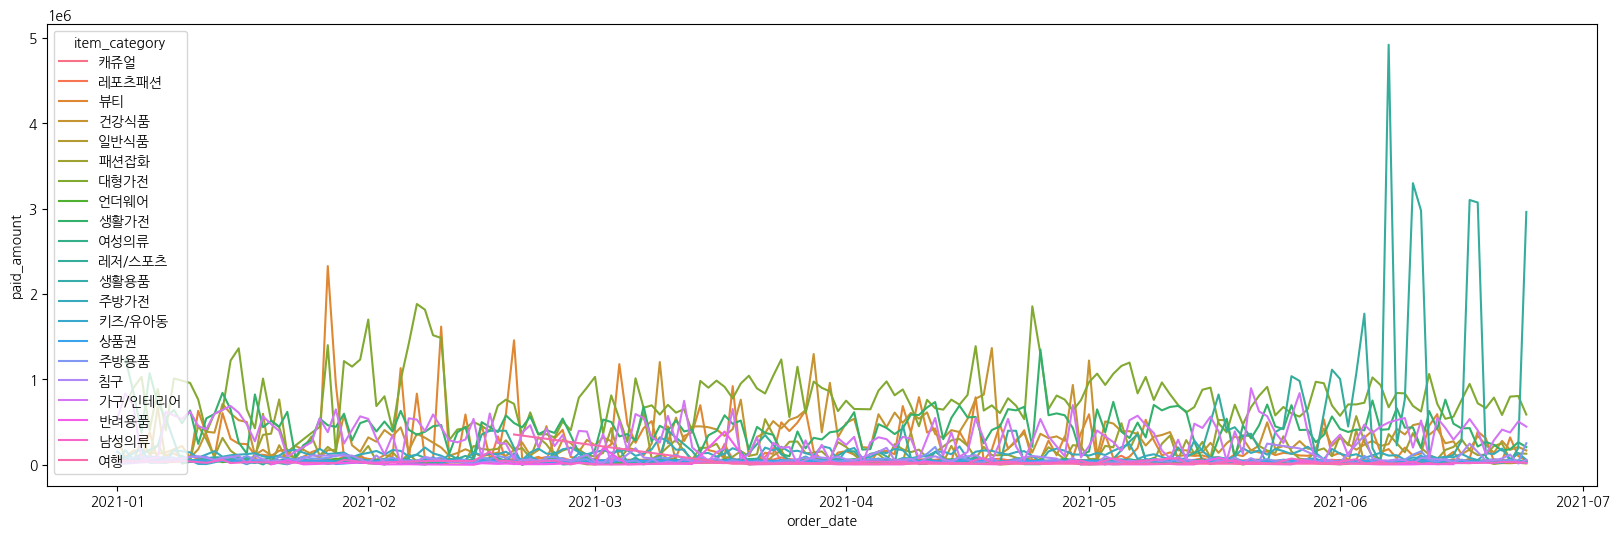

In [ ]:
#카테고리별 매출액
plt.figure(figsize = (20,6))
sns.lineplot(data=df_commerce, x='order_date', y='paid_amount', hue = 'item_category', ci = None)

In [ ]:
# 'order_date'와 'item_category'로 그룹화하고 'paid_amount'의 평균을 계산
df_date_category_avg = df_commerce.groupby(['order_date', 'item_category'])['paid_amount'].mean().reset_index()
df_date_category_avg


,order_date,item_category,paid_amount
0,2021-01-01,가구/인테리어,537200.000000
1,2021-01-01,건강식품,298000.000000
2,2021-01-01,남성의류,50555.714286
3,2021-01-01,레포츠패션,94773.913043
4,2021-01-01,뷰티,108500.000000
...,...,...,...
3077,2021-06-24,주방용품,253838.333333
3078,2021-06-24,침구,58130.000000
3079,2021-06-24,캐쥬얼,44216.627907
3080,2021-06-24,키즈/유아동,30602.000000


In [ ]:
import plotly.express as px

# Plotly Express를 사용하여 line plot 생성
fig = px.line(df_date_category_avg,
              x='order_date',
              y='paid_amount',
              color='item_category')

# 그래프 보여주기
fig.show()


In [ ]:
#2021.6월 목/금요일을 중심으로 레저/스포츠 카테고리의 매출이 높다

In [ ]:
df_commerce_june_sports = df_commerce[( df_commerce['item_category']=='레저/스포츠' )& (df_commerce['order_date']>='2021-06-01')]


In [ ]:
df_commerce_june_sports['weekday'] = df_commerce_june_sports['order_date'].dt.day_name()

<ipython-input-37-8373a8ab1f22>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='channel', ylabel='paid_amount'>

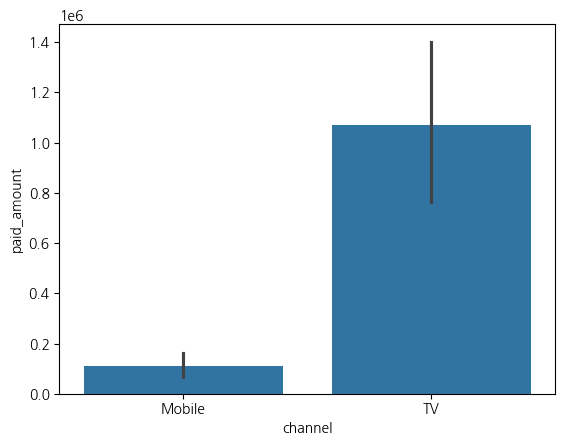

In [ ]:
sns.barplot(data= df_commerce_june_sports, x='channel', y = 'paid_amount')

<Axes: xlabel='age_group', ylabel='paid_amount'>

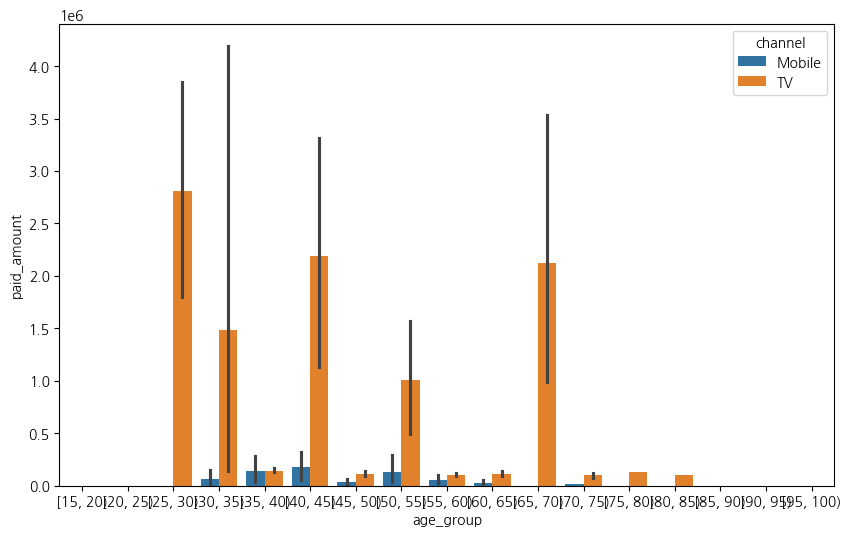

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(data= df_commerce_june_sports, x='age_group', y = 'paid_amount', hue = 'channel')

<Axes: xlabel='item_name', ylabel='paid_amount'>

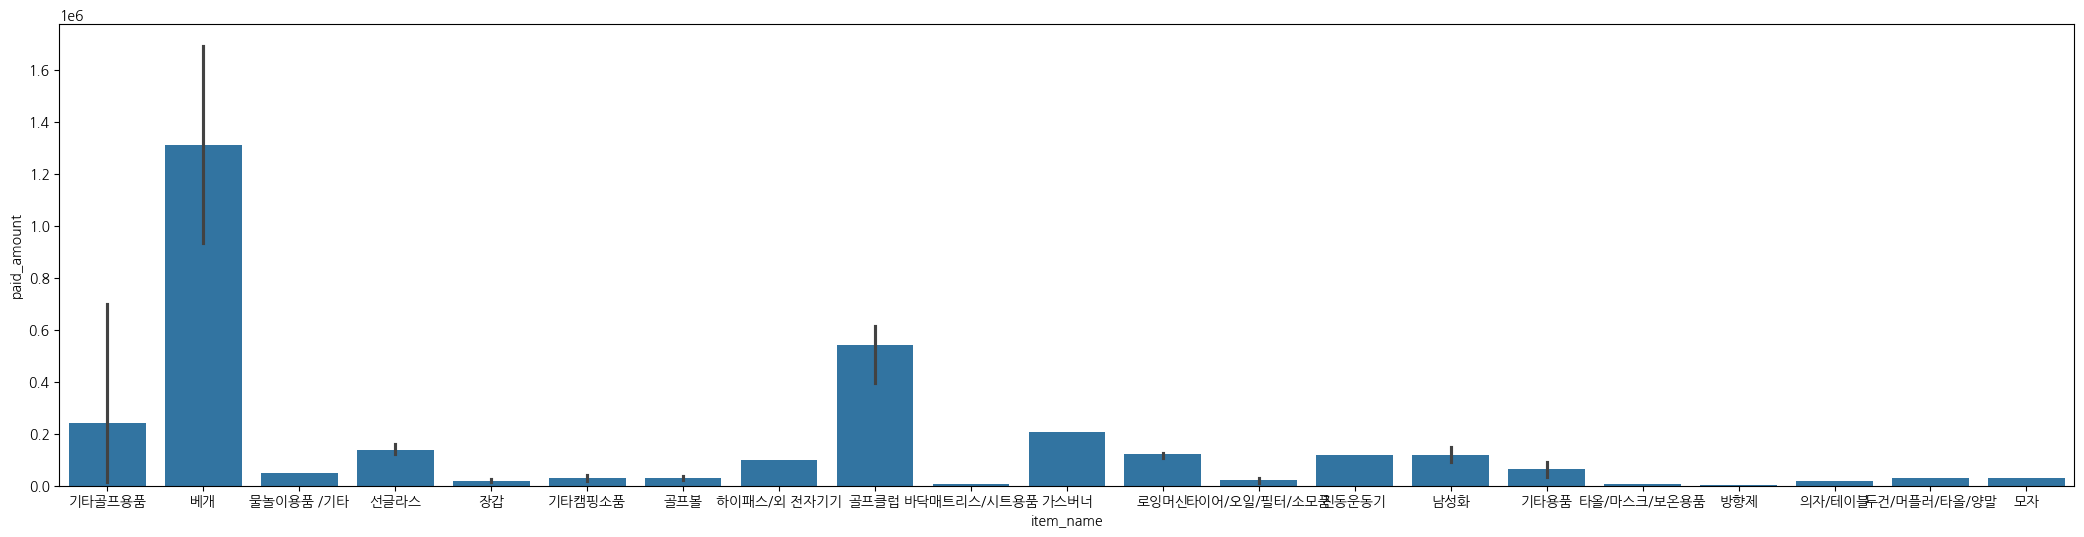

In [ ]:
plt.figure(figsize = (26,6))
sns.barplot(data= df_commerce_june_sports, x='item_name', y = 'paid_amount')

In [ ]:
# age_group별로 가장 많이 구매한 item_name 찾기
top_items_by_age_group = df_commerce_june_sports.groupby('age_group')['item_name'].agg(
    lambda x: x.value_counts().head(3).index.tolist() if not x.empty else None
)
top_items_by_age_group

age_group
[15, 20)                        None
[20, 25)                        None
[25, 30)                        [베개]
[30, 35)          [선글라스, 베개, 기타캠핑소품]
[35, 40)          [선글라스, 기타용품, 골프클럽]
[40, 45)             [베개, 골프볼, 기타용품]
[45, 50)           [베개, 기타캠핑소품, 골프볼]
[50, 55)          [베개, 기타골프용품, 로잉머신]
[55, 60)               [베개, 골프볼, 장갑]
[60, 65)     [베개, 물놀이용품 /기타, 기타골프용품]
[65, 70)                  [베개, 선글라스]
[70, 75)          [베개, 로잉머신, 의자/테이블]
[75, 80)                      [로잉머신]
[80, 85)                        [베개]
[85, 90)                        None
[90, 95)                        None
[95, 100)                       None
Name: item_name, dtype: object

In [ ]:
#베개 상품 구매 데이터 추적 결과, 1구매당 30개 이상을 구매하는 대량 구매 존재
df_commerce[df_commerce['item_name'] == '베개'].sort_values(by = 'qty', ascending = False).head(20)

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,age_group,order_year_month,join_year_month
19234,2021050694204,68.0,9,202106072477557,2021-06-07,TV,레저/스포츠,323111270,베개,99000,100,9900000,100000,9800000,"[65, 70)",2021-06,2021-05
131500,2021050696387,69.0,9,202106072479741,2021-06-07,TV,레저/스포츠,323111270,베개,99000,100,9900000,1080000,8820000,"[65, 70)",2021-06,2021-05
138922,2021050598696,44.0,9,202106072474485,2021-06-07,TV,레저/스포츠,323111270,베개,99000,100,9900000,100000,9800000,"[40, 45)",2021-06,2021-05
103362,2021050598696,44.0,9,202106100801089,2021-06-10,TV,레저/스포츠,323111270,베개,99000,50,4950000,50000,4900000,"[40, 45)",2021-06,2021-05
51809,2021053950626,26.0,9,202106100804370,2021-06-10,TV,레저/스포츠,323111270,베개,99000,50,4950000,50000,4900000,"[25, 30)",2021-06,2021-05
99477,2021050598696,44.0,9,202105311688356,2021-05-31,TV,레저/스포츠,323111270,베개,99000,50,4950000,540000,4410000,"[40, 45)",2021-05,2021-05
13647,2021050598696,44.0,9,202106112942718,2021-06-11,TV,레저/스포츠,323111270,베개,99000,50,4950000,50000,4900000,"[40, 45)",2021-06,2021-05
105262,2021054734593,67.0,9,202106183607665,2021-06-18,TV,레저/스포츠,323111270,베개,149000,50,7450000,550000,6900000,"[65, 70)",2021-06,2021-05
46173,2021054736709,31.0,9,202106183609148,2021-06-18,TV,레저/스포츠,323111270,베개,149000,50,7450000,550000,6900000,"[30, 35)",2021-06,2021-05
28184,2021053951336,54.0,9,202106100804229,2021-06-10,TV,레저/스포츠,323111270,베개,99000,50,4950000,50000,4900000,"[50, 55)",2021-06,2021-05


### 카테고리별 단가분석

* 카테고리별 단가 분석
  - 다잇다의 상품 카테고리는 매우 다양하므로, 고단가 상품군과 중단가/저단가 상품군으로 그룹화해볼 수 있다.
    - 고단가 상품군 : 대형가전, 생활가전, 가구/인테리어
    - 중단가 상품군 : 여행, 주방가전, 건강식품, 패션잡화
    - 저단가 상품군 : 그 외 모든 카테고리

<Axes: xlabel='item_category', ylabel='price'>

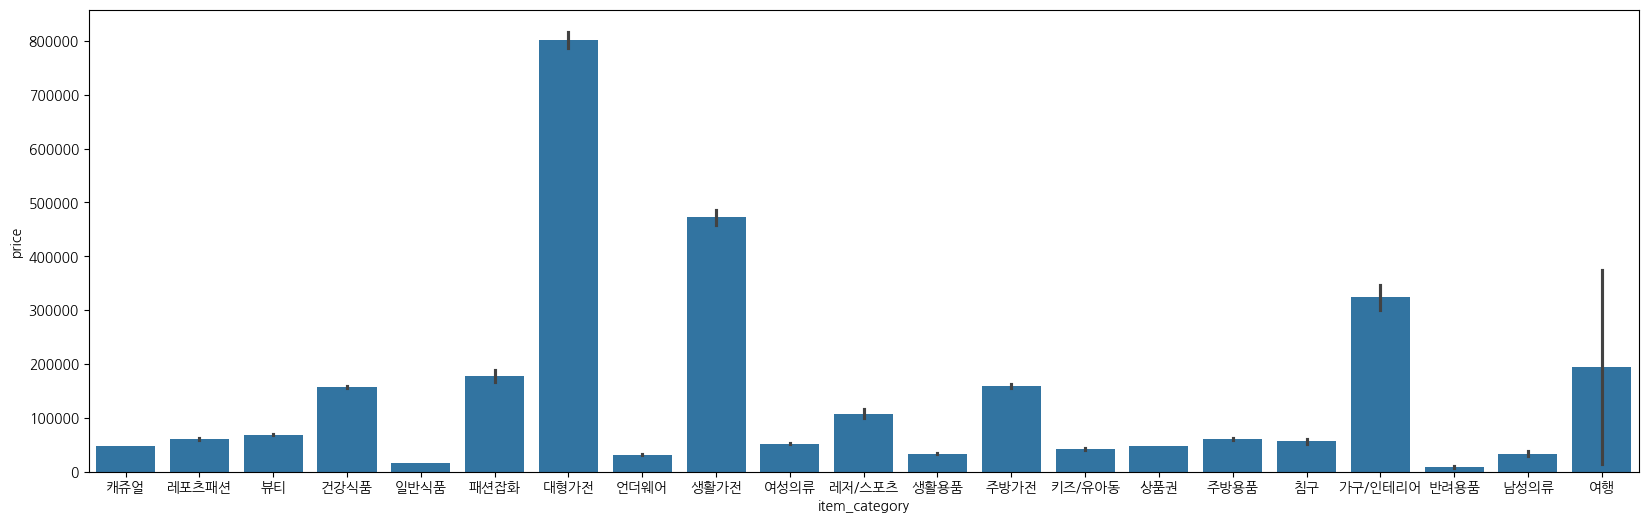

In [ ]:
#카테고리별 평균 단가 분석
plt.figure(figsize=(20,6))
sns.barplot(data = df_commerce, x = 'item_category', y='price')

In [ ]:
conditions = [
    df_commerce['item_category'].isin(['대형가전', '생활가전', '가구/인테리어']),
    df_commerce['item_category'].isin(['여행', '주방가전', '건강식품', '패션잡화'])
]

# 조건에 따른 분류 선택
choices = ['high', 'mid']

# 조건에 따라 item_price_category 열 추가
df_commerce['item_price_category'] = np.select(conditions, choices, default='low')


/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



In [ ]:
df_commerce['item_price_category'].unique()

array(['low', 'mid', 'high'], dtype=object)

### 카테고리별 재구매율 분석

* 카테고리/아이템별 재구매율 분석
 - 재구매 정의 : 한 명의 사용자가 2회 이상 구매한 경우 재구매로 간주한다.
 - 단가 카테고리별로는 저단가 카테고리의 재구매율이 가장 높게 나타났다.
 - 아이템 카티고리별로는 반려용품, 일반식품, 키즈/유아동 등의 재구매율이 높게 나타났다.
 - 아이템별로는 아이스박스/보온용품, 피스타치오, 찰흙/지점토/우드락 등의 재구매율이 높게 나타났다.

In [ ]:
#단가 카테고리별 재구매율 분석


# 고객별, 아이템 카테고리별 구매 횟수 계산
customer_price_category_purchases = df_commerce.groupby(['customer_no', 'item_price_category']).size().reset_index(name='purchase_count')

# 재구매 여부 표시 (구매 횟수가 2 이상이면 True, 아니면 False)
customer_price_category_purchases['repeated_purchase'] = customer_price_category_purchases['purchase_count'] > 1

# 아이템 카테고리별 재구매 고객 수 계산
repeated_customers_by_price_category = customer_price_category_purchases[customer_price_category_purchases['repeated_purchase']].groupby('item_price_category').size().reset_index(name='repeated_customers')

# 아이템 카테고리별 전체 구매 건수 계산
total_purchases_by_price_category = df_commerce.groupby('item_price_category').size().reset_index(name='total_purchases')

# 재구매율 계산을 위해 두 데이터프레임 병합
repurchase_rate_by_price_category = pd.merge(repeated_customers_by_price_category, total_purchases_by_price_category, on='item_price_category')

# 재구매율 계산
repurchase_rate_by_price_category['repurchase_rate'] = repurchase_rate_by_price_category['repeated_customers'] / repurchase_rate_by_price_category['total_purchases']

repurchase_rate_by_price_category[['item_price_category', 'repurchase_rate']].sort_values(by = 'repurchase_rate', ascending = False)


,item_price_category,repurchase_rate
1,low,0.158995
2,mid,0.105110
0,high,0.065422


In [ ]:
#카테고리별 재구매율 분석

# 고객별, 아이템 카테고리별 구매 횟수 계산
customer_category_purchases = df_commerce.groupby(['customer_no', 'item_category']).size().reset_index(name='purchase_count')

# 재구매 여부 표시 (구매 횟수가 2 이상이면 True, 아니면 False)
customer_category_purchases['repeated_purchase'] = customer_category_purchases['purchase_count'] > 1

# 아이템 카테고리별 재구매 고객 수 계산
repeated_customers_by_category = customer_category_purchases[customer_category_purchases['repeated_purchase']].groupby('item_category').size().reset_index(name='repeated_customers')

# 아이템 카테고리별 전체 구매 건수 계산
total_purchases_by_category = df_commerce.groupby('item_category').size().reset_index(name='total_purchases')

# 재구매율 계산을 위해 두 데이터프레임 병합
repurchase_rate_by_category = pd.merge(repeated_customers_by_category, total_purchases_by_category, on='item_category')

# 재구매율 계산
repurchase_rate_by_category['repurchase_rate'] = repurchase_rate_by_category['repeated_customers'] / repurchase_rate_by_category['total_purchases']

repurchase_rate_by_category[['item_category', 'repurchase_rate']].sort_values(by = 'repurchase_rate', ascending = False)


,item_category,repurchase_rate
6,반려용품,0.209877
13,일반식품,0.191922
18,키즈/유아동,0.185424
11,언더웨어,0.147299
2,남성의류,0.123529
10,생활용품,0.121486
1,건강식품,0.114295
15,주방용품,0.111678
4,레저/스포츠,0.111111
19,패션잡화,0.098820


In [ ]:
#아이템별 재구매율 분석

# 고객별, 아이템별 구매 횟수 계산
customer_item_purchases = df_commerce.groupby(['customer_no', 'item_name']).size().reset_index(name='purchase_count')

# 재구매 여부 표시 (구매 횟수가 2 이상이면 True, 아니면 False)
customer_item_purchases['repeated_purchase'] = customer_item_purchases['purchase_count'] > 1

# 아이템별 재구매 고객 수 계산
repeated_customers_by_item = customer_item_purchases[customer_item_purchases['repeated_purchase']].groupby('item_name').size().reset_index(name='repeated_customers')

# 아이템별 전체 구매 건수 계산
total_purchases_by_item = df_commerce.groupby('item_name').size().reset_index(name='total_purchases')

# 재구매율 계산을 위해 두 데이터프레임 병합
repurchase_rate_by_item = pd.merge(repeated_customers_by_item, total_purchases_by_item, on='item_name')

# 재구매율 계산
repurchase_rate_by_item['repurchase_rate'] = repurchase_rate_by_item['repeated_customers'] / repurchase_rate_by_item['total_purchases']

repurchase_rate_by_item[['item_name', 'repurchase_rate']].sort_values(by = 'repurchase_rate', ascending = False).head(30)


,item_name,repurchase_rate
427,아이스박스/보온용품,0.500000
704,피스타치오,0.500000
582,찰흙/지점토/우드락/폼포드/캔버스,0.500000
191,두부/두유/누룽지 제조기,0.500000
684,팬시용품,0.500000
61,과일 통조림,0.500000
215,레이저 복합기,0.500000
659,토종꿀,0.500000
432,액젓,0.500000
219,롱/원피스/루즈핏,0.500000


In [ ]:
#평균 재구매율
print(repurchase_rate_by_item['repurchase_rate'].mean())

0.16031861256137345


### 회원가입연월별 분석

* 회원가입연월별 분석
  - 2018년 회원수는 소폭씩 우상향하고 있으나, 2021년 4월 이후 감소하는 추세에 있어 회원 확보를 위한 정책 필요

In [ ]:
# customer_no 컬럼 str형식으로 변환 후, 왼쪽부터 6개 글자 추출 --> join_year_month 컬럼에 할당
df_commerce['join_year_month'] = df_commerce['customer_no'].astype(str).str.slice(0, 6)

# join_yearmonth 컬럼을 datetime 형식으로 변환
df_commerce['join_year_month'] = pd.to_datetime(df_commerce['join_year_month'], format='%Y%m')

# yyyy-mm형식으로 변환
df_commerce['join_year_month'] = df_commerce['join_year_month'].dt.strftime('%Y-%m')

In [ ]:
print(df_commerce['join_year_month'].min())
print(df_commerce['join_year_month'].max())

2015-01
2021-06


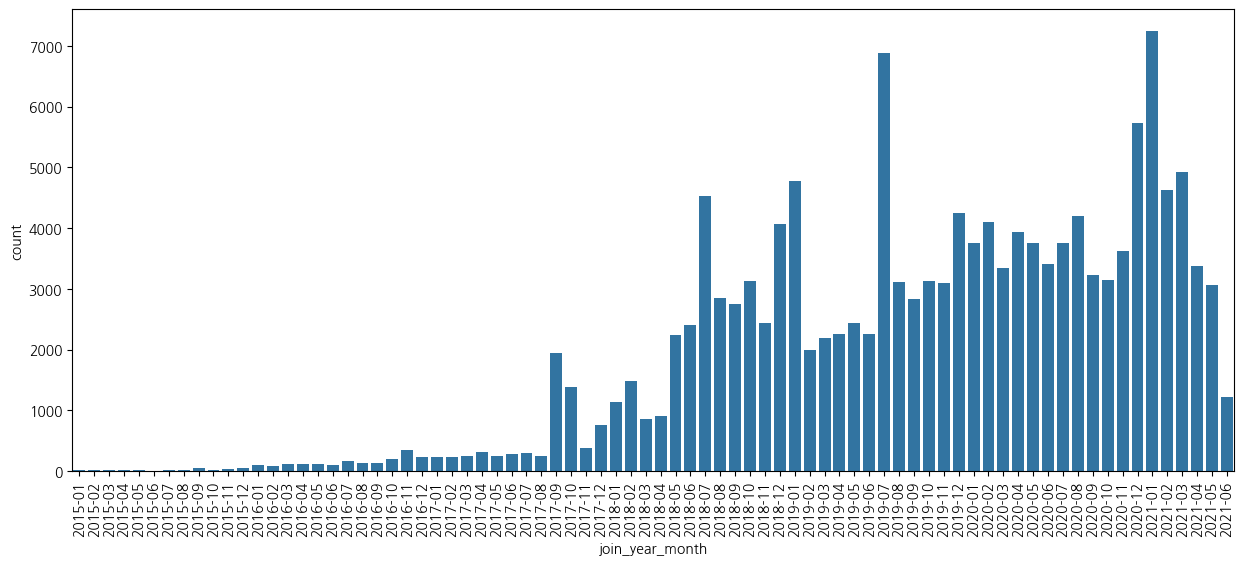

In [ ]:
#가입연월별 회원수
plt.figure(figsize = (15,6))
sns.countplot(data = df_commerce.sort_values(by = 'join_year_month'), x= 'join_year_month')
plt.xticks(rotation = 90);

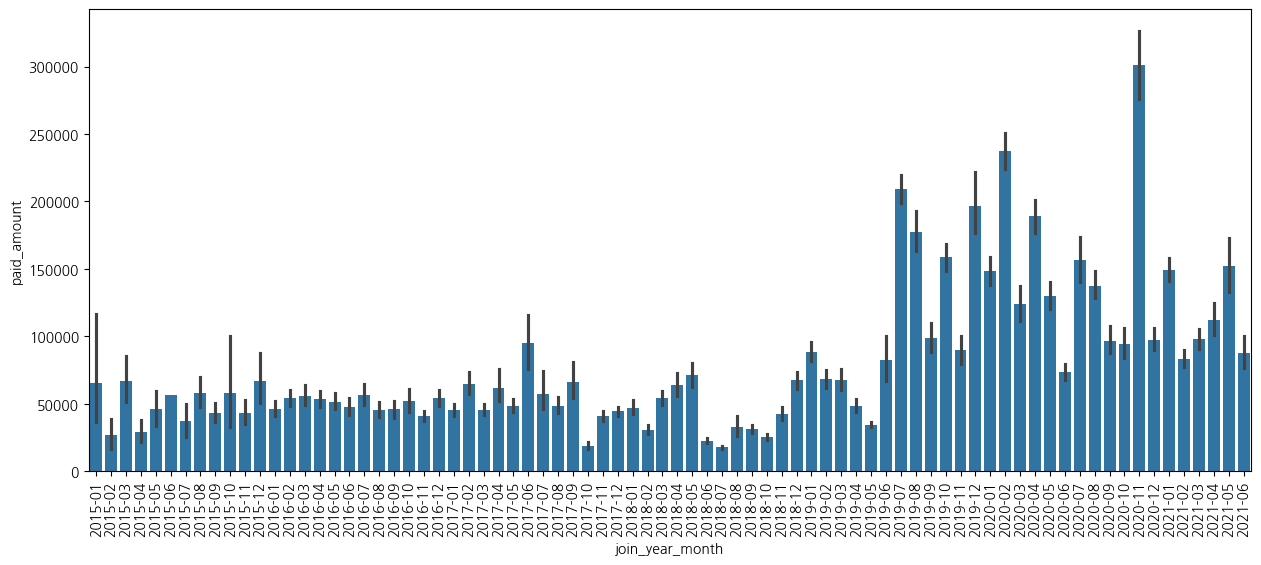

In [ ]:
#가입연월별 매출액
plt.figure(figsize = (15,6))
sns.barplot(data = df_commerce.sort_values(by = 'join_year_month'), x= 'join_year_month', y = 'paid_amount')
plt.xticks(rotation = 90);

## association rule 기반 cross selling 전략
 ### apriori 알고리즘 적용

- 참고자료
  - https://colab.research.google.com/drive/1EU2EFWeA92YqAj9QqO3HVUWLpMl0QiS1
  -  https://www.kaggle.com/code/yugagrawal95/market-basket-analysis-apriori-in-python


In [ ]:
!pip install apyori


In [ ]:
from apyori import apriori

In [ ]:
! pip install --index-url https://test.pypi.org/simple/ PyARMViz

Looking in indexes: https://test.pypi.org/simple/


In [ ]:
import networkx as nx
import plotly.express as px
import warnings
from PyARMViz import PyARMViz

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [ ]:

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### 아이템(item_name) 기준 연관 분석
  - lift 기준 상위 10개 규칙 분석 결과, IH압력밥솥, 일반압력밥솥, 미니/업소용 전기밥솥, 공기청정기, 핸디형 청소기, 전자레인지 간의 중복 구매 확률이 높다.
  - lift 기준 상위 아이템은 대부분 주방가전, 소형가전 카테고리의 제품이다.

In [ ]:
# 연관 규칙 분석에 필요한 컬럼만 선택하여 다시 객체 지정하기
df_asso = df_commerce[['customer_no', 'item_code', 'item_name']]
df_asso.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,customer_no,item_code,item_name
0,2021059651101,323421750,밴딩팬츠
1,2018069800502,323516657,트랙수트
2,2019073300103,323393459,기초세트
3,2020075283364,323420069,유산균
4,2020104780765,321820178,건강주스


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: Deprecati

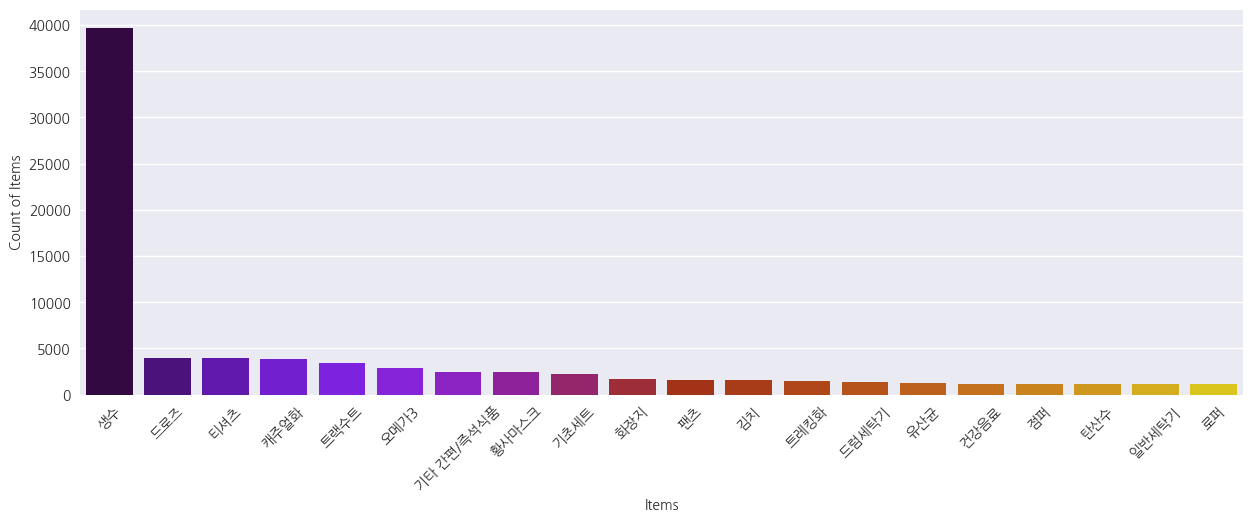

In [ ]:
#top 20 판매아이템 및 판매 개수

plt.figure(figsize=(15,5))
plt.rc('font', family='NanumGothic')
sns.barplot(x = df_asso['item_name'].value_counts().head(20).index, y = df_asso['item_name'].value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Items', size = 10)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 10)
plt.show()


In [ ]:
# apriori 모델 적용을 위한 품목 리스트 가공
itemset = df_asso.drop_duplicates(
    ['customer_no', 'item_name']).groupby(['customer_no'])['item_name'].apply(list)

itemset = pd.DataFrame(itemset).reset_index().drop(['customer_no'], axis = 'columns')

itemset = itemset.squeeze()

itemset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0                    [도가니탕, 혈당/혈압측정기]
1                              [이온음료]
2    [닭고기(계육), 크리스피롤, 오메가3, 도가니탕, 사과]
3                               [유산균]
4                              [기모팬츠]
Name: item_name, dtype: object

In [ ]:
# apriori 모델 적용을 위한 장바구니 - 품목 더미 가공

encoder = TransactionEncoder()
encoder_T = encoder.fit(itemset).transform(itemset)

# 데이터프레임으로 변경
itemset_matrix = pd.DataFrame(encoder_T, columns=encoder.columns_)

itemset_matrix.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,18K쥬얼리,18K쥬얼리세트,2-4단 서랍장/협탁,2-5인용텐트,2구 가스레인지,2구 이상 전기레인지,7부/9부/크롭,DIY반제품,IH압력밥솥,LA갈비,...,후라이팬24-26cm,후라이팬28cm이상,후라이팬2종세트,후라이팬세트,후지필름,훌라후프,훌라후프/짐볼,휴대폰 거치대,흑미,흑염소즙
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 지지도 0.0005 기준으로 apriori 적용

itemset_apriori = apriori(itemset_matrix, min_support = 0.0005, use_colnames=True)
print(len(itemset_apriori))
itemset_apriori.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



367


,support,itemsets
0,0.001569,(IH압력밥솥)
1,0.009011,(LA갈비)
2,0.001805,(LED TV)
3,0.001888,(가글/치약)
4,0.000944,(가발세트)
5,0.005012,(가죽재킷)
6,0.002263,(각티슈)
7,0.001097,(간편/즉석식품 혼합세트)
8,0.002152,(갈비찜)
9,0.005776,(갈비탕)


In [ ]:
# 지지도 0.001 기준으로 apriori 적용  --> 0.0005일 때보다 아이템 수 감소

itemset_apriori_2 = apriori(itemset_matrix, min_support = 0.001, use_colnames=True)
print(len(itemset_apriori_2))
itemset_apriori_2.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



198


,support,itemsets
0,0.001569,(IH압력밥솥)
1,0.009011,(LA갈비)
2,0.001805,(LED TV)
3,0.001888,(가글/치약)
4,0.005012,(가죽재킷)
5,0.002263,(각티슈)
6,0.001097,(간편/즉석식품 혼합세트)
7,0.002152,(갈비찜)
8,0.005776,(갈비탕)
9,0.005790,(갈치)


In [ ]:
# 'itemsets' 컬럼의 각 요소에 '생수'가 포함되어 있는지 확인하여 해당 조건을 만족하는 행만 필터링
filtered_itemsets = itemset_apriori[itemset_apriori['itemsets'].apply(lambda x: '생수' in x)]
filtered_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets
140,0.185044,(생수)
294,0.000569,"(생수, 각티슈)"
295,0.008303,"(생수, 건강음료)"
305,0.001708,"(생수, 기타 간편/즉석식품)"
309,0.000666,"(생수, 기타 주스/음료)"
310,0.000889,"(생수, 기타 축산물)"
311,0.000889,"(생수, 나시/홈웨어)"
322,0.000569,"(생수, 두유)"
323,0.000625,"(생수, 둥글레/옥수수/결명자차)"
327,0.008150,"(생수, 드로즈)"


* association_rules --> 아이템 조합 기반으로 실제 연관 관계 생성
  
 - 선행 항목(Antecedents): 규칙이 적용되기 전에 구매된 아이템
 - 후행 항목(Consequents): 규칙에 따라 이후에 구매될 가능성이 있는 아이템
 - 선행 항목 지지도(Antecedent Support): 전체 거래 중 선행 항목이 포함된 비율
 - 후행 항목 지지도(Consequent Support): 전체 거래 중 후행 항목이 포함된 비율
 - 지지도(Support): 전체 거래 중 선행 항목과 후행 항목이 동시에 포함된 비율
 - 신뢰도(Confidence): 선행 항목이 포함된 거래에서 후행 항목도 포함될 확률
 - 리프트(Lift): 선행 항목이 판매될 때 후행 항목의 판매 비율이 얼마나 증가하는지를 나타내는 지표
 - 레버리지(Leverage): 선행 항목과 후행 항목이 함께 나타나는 비율과 이들이 독립적일 때 기대되는 비율의 차이
 - 컨빅션(Conviction): 선행 항목이 후행 항목에 얼마나 의존하고 있는지를 나타내는 지표
 - Zhang's metric : 연관 규칙 분석에서 사용되는 평가 지표 중 하나. 이 지표는 규칙의 신뢰도와 지지도를 통해 규칙의 강도와 신뢰성을 평가

In [ ]:
# 향상도 1 이상 상품 조합 추출
rules = association_rules(itemset_apriori, metric="lift", min_threshold=1)
rules.sort_values(by = 'lift', ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
225,"(일반압력밥솥, IH압력밥솥)","(공기청정기, 전자레인지)",0.001291,0.000694,0.000680,0.526882,758.983656,0.000679,2.112169,0.999974
222,"(전자레인지, IH압력밥솥)","(공기청정기, 일반압력밥솥)",0.001291,0.000694,0.000680,0.526882,758.983656,0.000679,2.112169,0.999974
223,"(공기청정기, 일반압력밥솥)","(전자레인지, IH압력밥솥)",0.000694,0.001291,0.000680,0.980000,758.983656,0.000679,49.935440,0.999376
220,"(공기청정기, 전자레인지)","(일반압력밥솥, IH압력밥솥)",0.000694,0.001291,0.000680,0.980000,758.983656,0.000679,49.935440,0.999376
204,"(핸디형청소기, 일반압력밥솥)",(미니/업소용 전기밥솥),0.000958,0.000708,0.000514,0.536232,757.306621,0.000513,2.154723,0.999637
...,...,...,...,...,...,...,...,...,...,...
82,(생수),(드로즈),0.185044,0.031086,0.008150,0.044043,1.416799,0.002398,1.013554,0.360981
20,(생수),(각티슈),0.185044,0.002263,0.000569,0.003076,1.359316,0.000150,1.000816,0.324356
21,(각티슈),(생수),0.002263,0.185044,0.000569,0.251534,1.359316,0.000150,1.088834,0.264936
49,(기타 주스/음료),(생수),0.003429,0.185044,0.000666,0.194332,1.050192,0.000032,1.011528,0.047957


In [ ]:
# 생수를 포함하는 조합 확인
filtered_rules = rules[(rules['antecedents'].apply(lambda x: any('생수' in item for item in x)) |
                        rules['consequents'].apply(lambda x: any('생수' in item for item in x)))]

filtered_rules.sort_values(by='lift', ascending=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
23,(건강음료),(생수),0.012454,0.185044,0.008303,0.666667,3.602741,0.005998,2.444867,0.731544
22,(생수),(건강음료),0.185044,0.012454,0.008303,0.044868,3.602741,0.005998,1.033937,0.886470
52,(생수),(나시/홈웨어),0.185044,0.002652,0.000889,0.004802,1.810802,0.000398,1.002160,0.549427
53,(나시/홈웨어),(생수),0.002652,0.185044,0.000889,0.335079,1.810802,0.000398,1.225642,0.448949
95,(스타킹 세트),(생수),0.002569,0.185044,0.000847,0.329730,1.781896,0.000372,1.215861,0.439930
94,(생수),(스타킹 세트),0.185044,0.002569,0.000847,0.004577,1.781896,0.000372,1.002018,0.538434
96,(생수),(주방세제/베이킹소다),0.185044,0.004471,0.001291,0.006978,1.560815,0.000464,1.002525,0.440894
97,(주방세제/베이킹소다),(생수),0.004471,0.185044,0.001291,0.288820,1.560815,0.000464,1.145920,0.360923
74,(생수),(둥글레/옥수수/결명자차),0.185044,0.002263,0.000625,0.003376,1.491933,0.000206,1.001117,0.404597
75,(둥글레/옥수수/결명자차),(생수),0.002263,0.185044,0.000625,0.276074,1.491933,0.000206,1.125744,0.330476


In [ ]:

# Ignore specific deprecation warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='ipykernel.ipkernel')
warnings.filterwarnings('ignore', category=DeprecationWarning, module='pandas.core.dtypes.cast')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



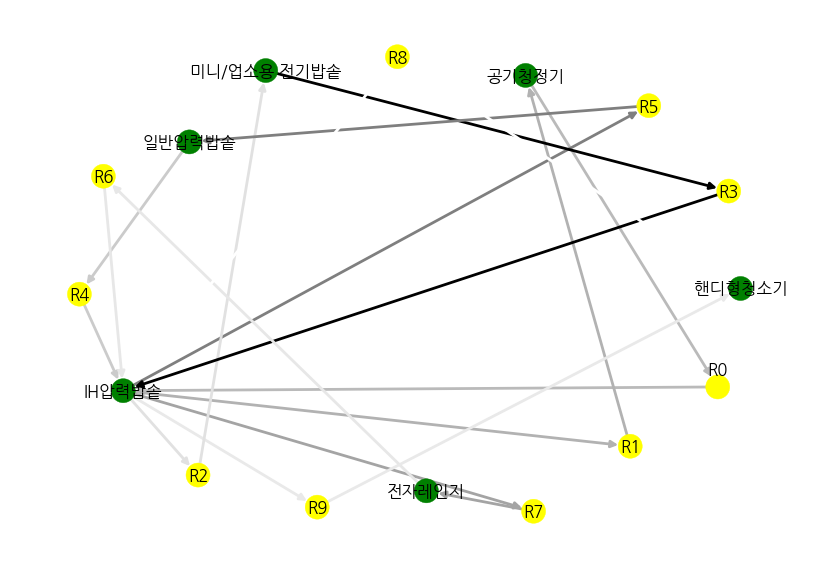

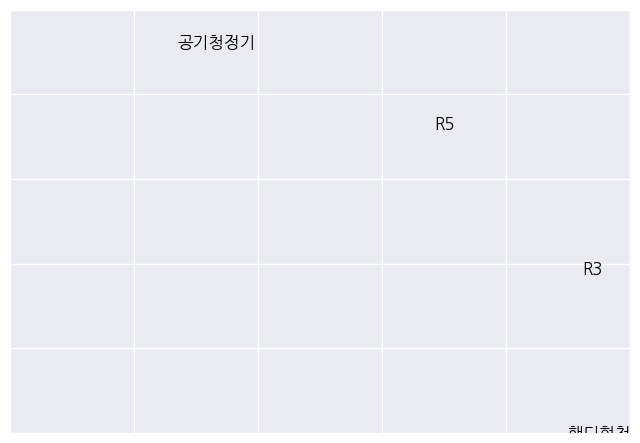

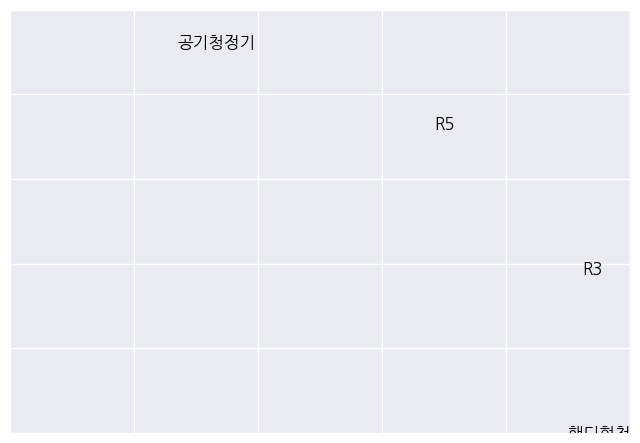

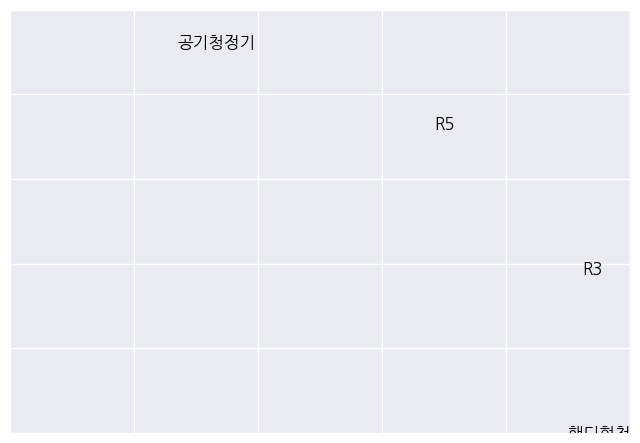

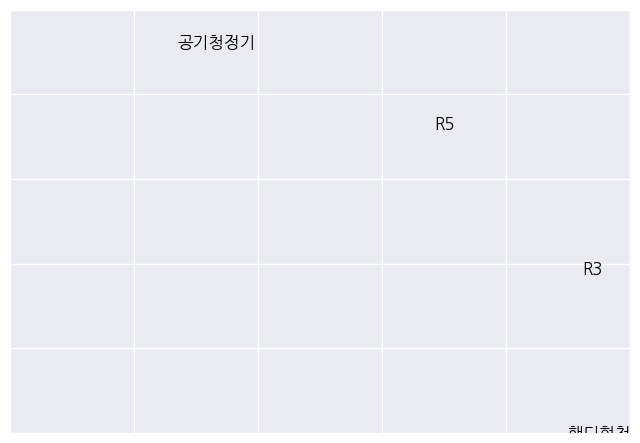

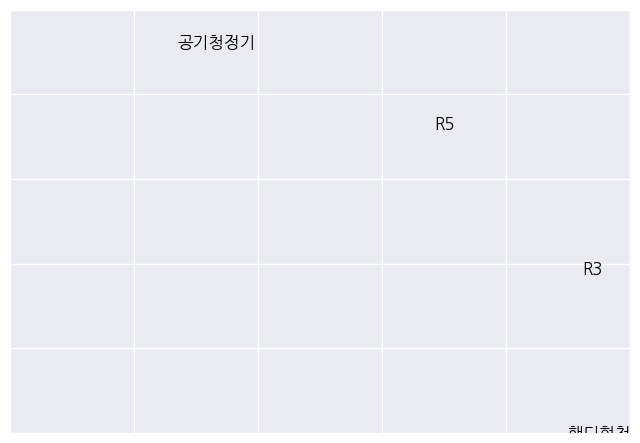

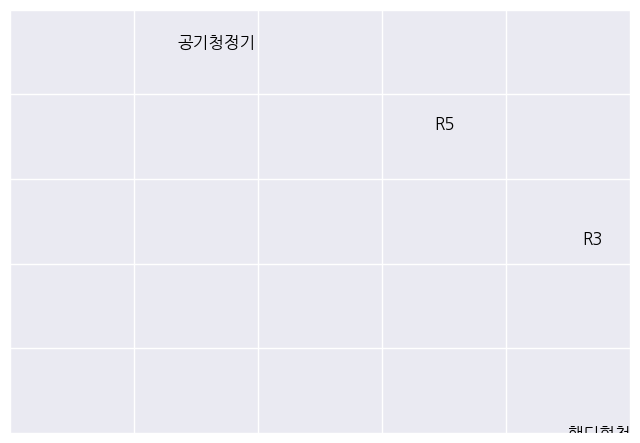

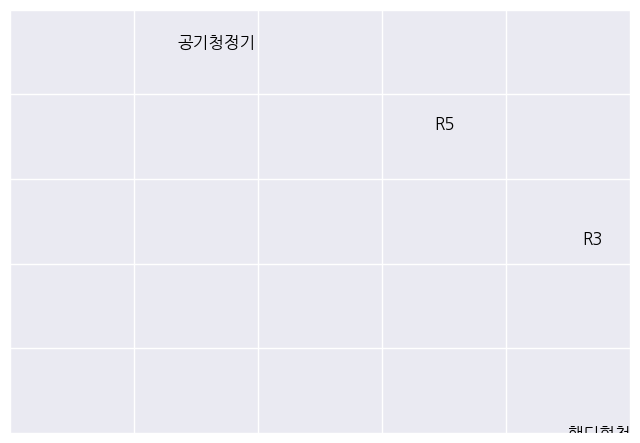

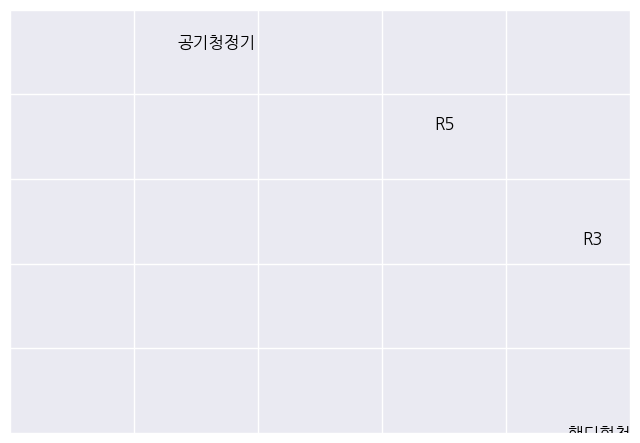

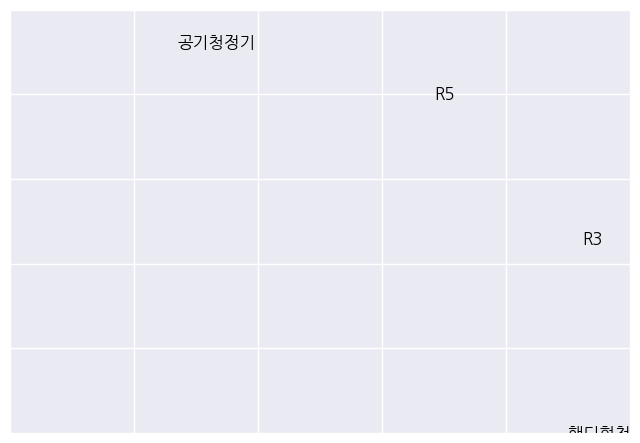

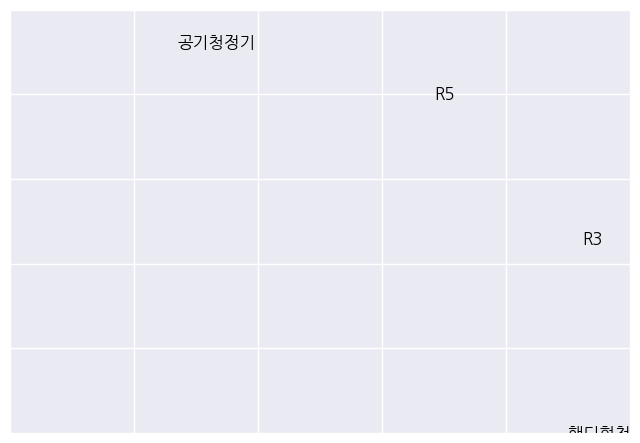

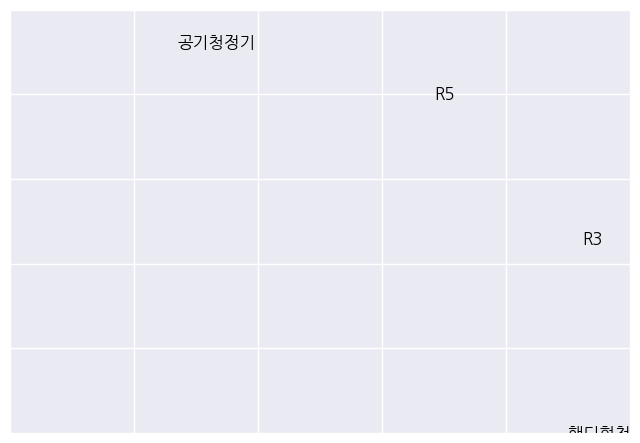

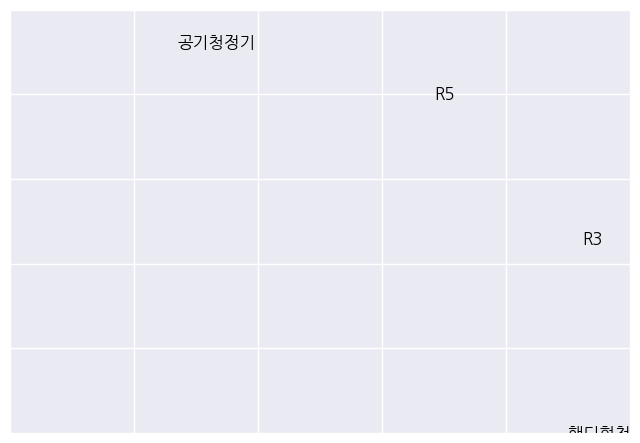

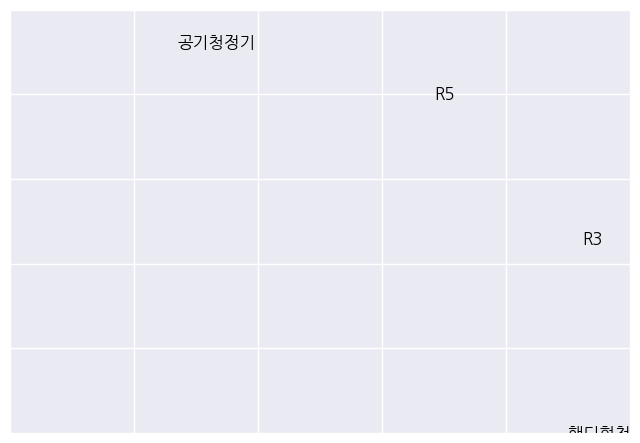

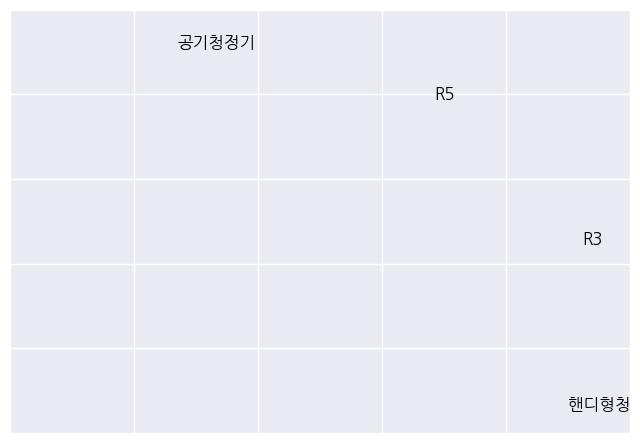

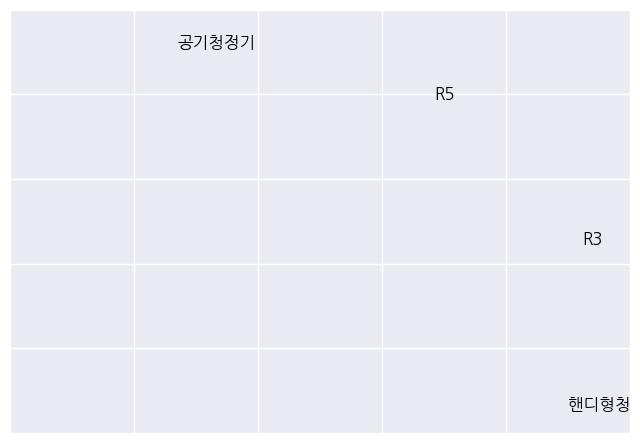

In [ ]:
plt.rc('font', family='NanumGothic')

def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs:
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    plt.close('all')
    plt.figure()
    nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16,
            with_labels=False, font_family='NanumGothic')

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
        nx.draw_networkx_labels(G1, pos, font_family='NanumGothic')
        plt.show()

draw_graph (rules, 10)

### 카테고리(item_category) 기준 연관 분석
 * lift기준 상위 10개 rule 분석 결과, 대형가전, 주방가전, 생활가전 카테고리의 중복 구매 확률이 높다.

In [ ]:
# item 카테고리를 대상으로 연관 규칙 분석에 필요한 컬럼만 선택하여 다시 객체 지정하기
df_asso_2 = df_commerce[['customer_no', 'item_code', 'item_category']]
df_asso_2.head(10)

,customer_no,item_code,item_category
0,2021059651101,323421750,캐쥬얼
1,2018069800502,323516657,레포츠패션
2,2019073300103,323393459,뷰티
3,2020075283364,323420069,건강식품
4,2020104780765,321820178,일반식품
5,2016105897736,321409784,패션잡화
6,2020016102337,320105541,일반식품
7,2019097045198,321658904,일반식품
8,2021036797119,322670879,일반식품
9,2020018676591,322547720,일반식품


In [ ]:
# apriori 모델 적용을 위한 품목 리스트 가공
itemset_cat = df_asso_2.drop_duplicates(
    ['customer_no', 'item_category']).groupby(['customer_no'])['item_category'].apply(list)

itemset_cat = pd.DataFrame(itemset_cat).reset_index().drop(['customer_no'], axis = 'columns')

itemset_cat = itemset_cat.squeeze()

itemset_cat.head()

0    [일반식품, 생활가전]
1          [일반식품]
2    [일반식품, 건강식품]
3          [건강식품]
4          [여성의류]
Name: item_category, dtype: object

In [ ]:
# apriori 모델 적용을 위한 장바구니 - 품목 더미 가공

encoder_2 = TransactionEncoder()
encoder_T_2 = encoder.fit(itemset_cat).transform(itemset_cat)

# 데이터프레임으로 변경
itemset_matrix_cat = pd.DataFrame(encoder_T_2, columns=encoder.columns_)

itemset_matrix_cat.head()

,가구/인테리어,건강식품,남성의류,대형가전,레저/스포츠,레포츠패션,반려용품,뷰티,상품권,생활가전,...,언더웨어,여성의류,여행,일반식품,주방가전,주방용품,침구,캐쥬얼,키즈/유아동,패션잡화
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
# 지지도 0.0005 기준으로 apriori 적용

itemset_apriori_cat = apriori(itemset_matrix_cat, min_support = 0.0005, use_colnames=True)
print(len(itemset_apriori_cat))
itemset_apriori_cat.head(10)

78


,support,itemsets
0,0.007331,(가구/인테리어)
1,0.047427,(건강식품)
2,0.001916,(남성의류)
3,0.010510,(대형가전)
4,0.005901,(레저/스포츠)
5,0.142407,(레포츠패션)
6,0.000680,(반려용품)
7,0.031655,(뷰티)
8,0.026199,(생활가전)
9,0.099214,(생활용품)


In [ ]:
# 향상도 1 이상 상품 조합 추출
rules_cat = association_rules(itemset_apriori_cat, metric="lift", min_threshold=1)
rules_cat = rules_cat.sort_values(by = 'lift', ascending = False)
rules_cat

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,"(생활가전, 주방가전)",(대형가전),0.001194,0.010510,0.000958,0.802326,76.338576,0.000945,5.005655,0.988080
34,(대형가전),"(생활가전, 주방가전)",0.010510,0.001194,0.000958,0.091149,76.338576,0.000945,1.098977,0.997383
33,(생활가전),"(대형가전, 주방가전)",0.026199,0.001111,0.000958,0.036566,32.921264,0.000929,1.036801,0.995711
32,"(대형가전, 주방가전)",(생활가전),0.001111,0.026199,0.000958,0.862500,32.921264,0.000929,7.082190,0.970703
35,(주방가전),"(생활가전, 대형가전)",0.011621,0.003402,0.000958,0.082437,24.235213,0.000918,1.086137,0.970010
...,...,...,...,...,...,...,...,...,...,...
0,(뷰티),(건강식품),0.031655,0.047427,0.001805,0.057018,1.202209,0.000304,1.010170,0.173696
29,(패션잡화),"(건강식품, 일반식품)",0.076181,0.006873,0.000555,0.007290,1.060740,0.000032,1.000421,0.061984
24,"(건강식품, 일반식품)",(패션잡화),0.006873,0.076181,0.000555,0.080808,1.060740,0.000032,1.005034,0.057659
49,(일반식품),"(생활용품, 언더웨어)",0.394080,0.002818,0.001152,0.002924,1.037523,0.000042,1.000106,0.059688


In [ ]:
# 레저/스포츠를 포함하는 조합 확인
filtered_rules_cat = rules_cat[(rules_cat['antecedents'].apply(lambda x: any('레저/스포츠' in item for item in x)) |
                                  rules_cat['consequents'].apply(lambda x: any('레저/스포츠' in item for item in x)))]

filtered_rules_cat.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


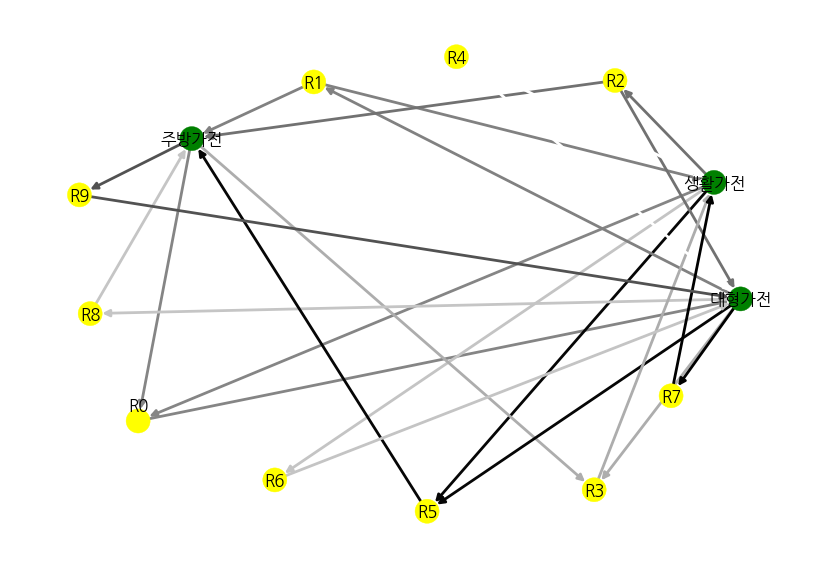

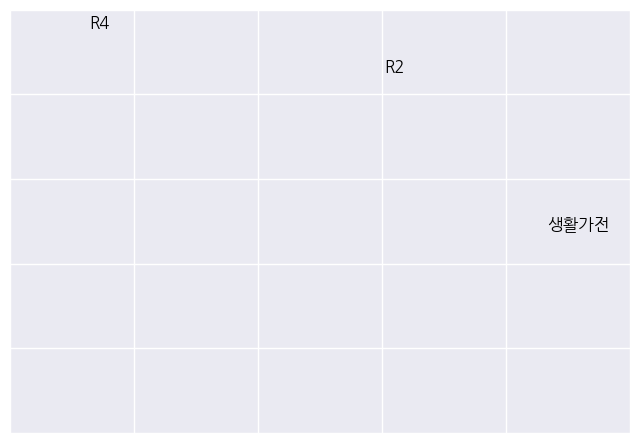

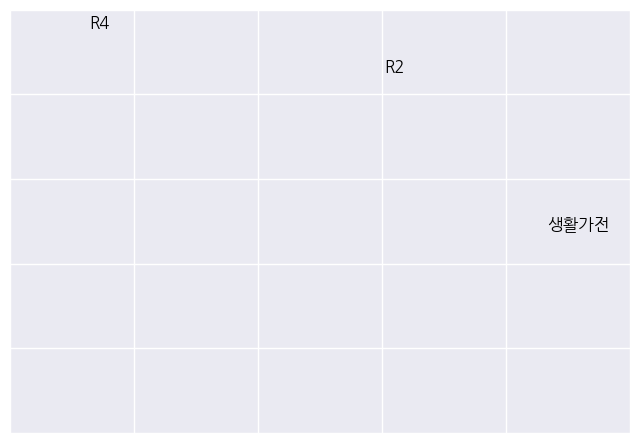

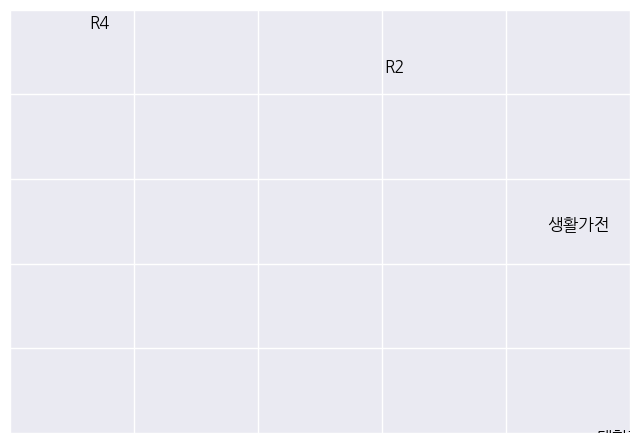

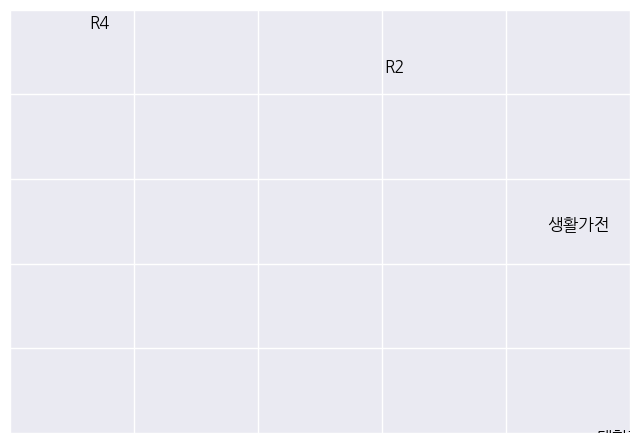

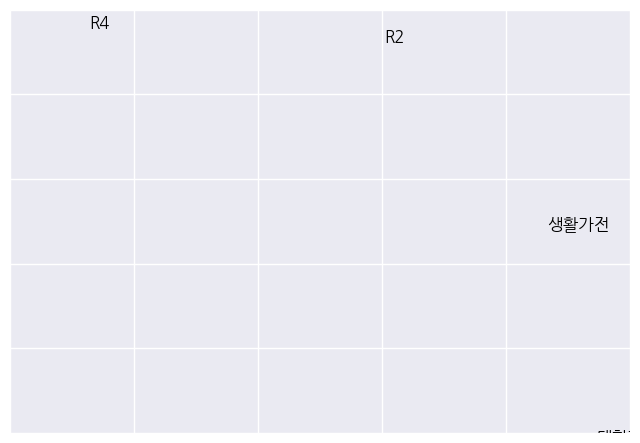

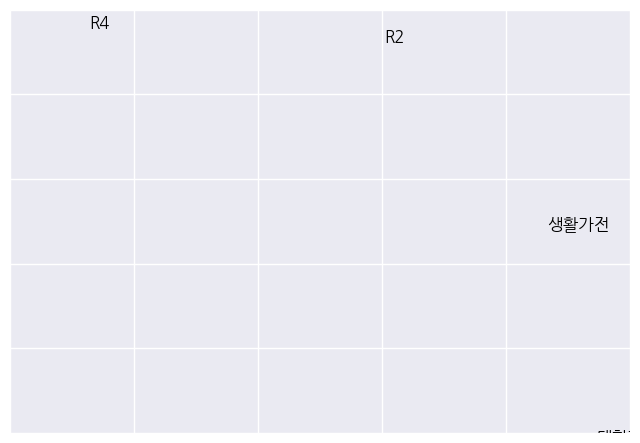

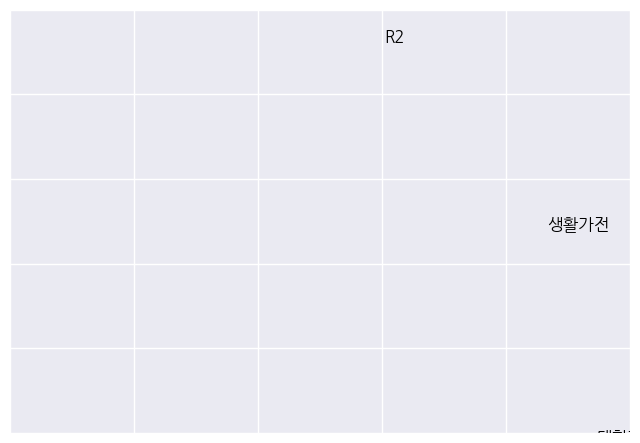

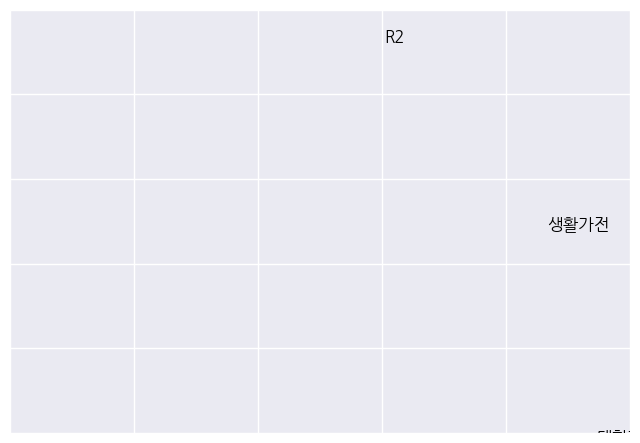

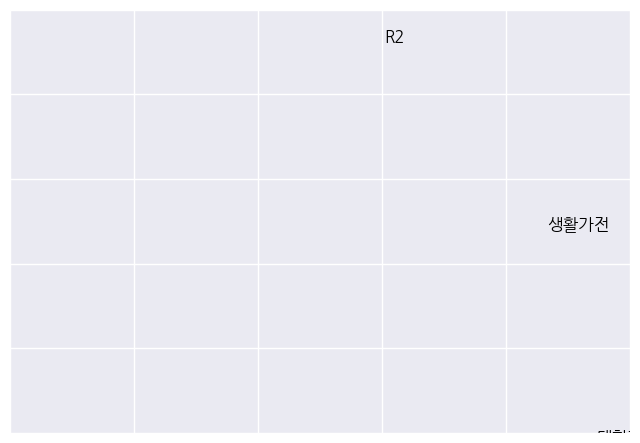

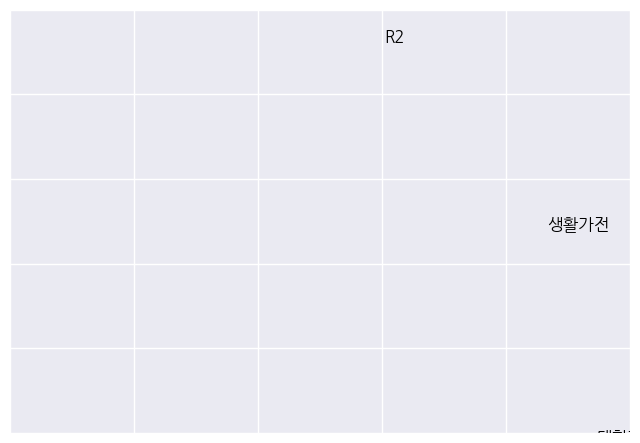

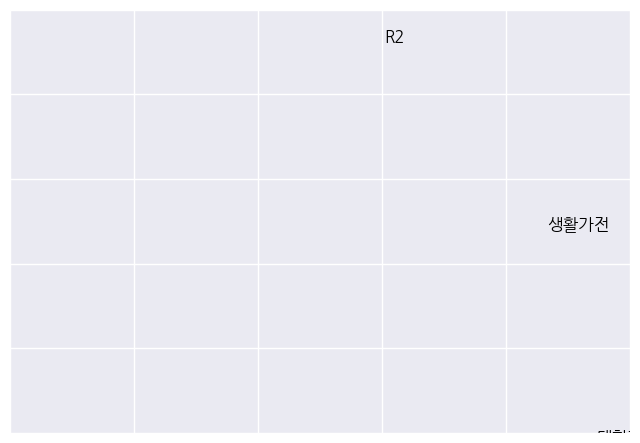

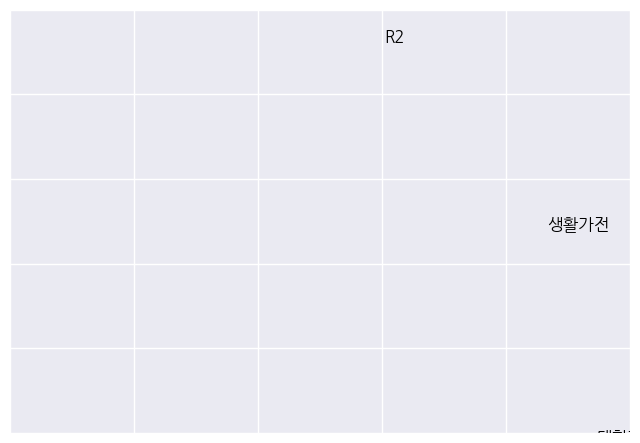

In [ ]:
plt.rc('font', family='NanumGothic')

def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs:
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    plt.close('all')
    plt.figure()
    nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16,
            with_labels=False, font_family='NanumGothic')

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
        nx.draw_networkx_labels(G1, pos, font_family='NanumGothic')
        plt.show()

draw_graph (rules_cat, 10)

### 저단가 카테고리 상품의 연관분석
 - lift 기준 상위 10개 연관규칙 분석 결과, 저단가 카테고리에서는, (기타반찬류, 기타 간편/즉석식품, 김치혼합세트) 조합과 (기타 즉석탕, 기타반찬류) 조합,  (곰탕/도가니탕, 기타 반찬류) 조합의 중복구매 확률이 높은 것으로 나타났다.

In [ ]:
items = ['캐쥬얼', '레포츠패션', '뷰티', '일반식품',  '언더웨어',  '여성의류',
              '레저/스포츠', '생활용품',  '키즈/유아동', '상품권', '주방용품', '침구',  '반려용품', '남성의류']
df_asso_usual = df_commerce[df_commerce['item_category'].isin(items)]
df_asso_usual = df_asso_usual[['customer_no', 'item_code', 'item_name']]
df_asso_usual.head(10)

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



,customer_no,item_code,item_name
0,2021059651101,323421750,밴딩팬츠
1,2018069800502,323516657,트랙수트
2,2019073300103,323393459,기초세트
4,2020104780765,321820178,건강주스
6,2020016102337,320105541,생수
7,2019097045198,321658904,떡
8,2021036797119,322670879,오렌지
9,2020018676591,322547720,LA갈비
10,2019021890482,320105539,생수
12,2020034989894,322397305,트랙수트


In [ ]:
# apriori 모델 적용을 위한 품목 리스트 가공
itemset_usual = df_asso_usual.drop_duplicates(
    ['customer_no', 'item_name']).groupby(['customer_no'])['item_name'].apply(list)

itemset_usual = pd.DataFrame(itemset_usual).reset_index().drop(['customer_no'], axis = 'columns')

itemset_usual = itemset_usual.squeeze()

itemset_usual.head()

0                        [도가니탕]
1                        [이온음료]
2    [닭고기(계육), 크리스피롤, 도가니탕, 사과]
3                        [기모팬츠]
4                  [여름팬츠, 패딩점퍼]
Name: item_name, dtype: object

In [ ]:
# apriori 모델 적용을 위한 장바구니 - 품목 더미 가공

encoder_3 = TransactionEncoder()
encoder_T_3 = encoder.fit(itemset_usual).transform(itemset_usual)

# 데이터프레임으로 변경
itemset_matrix_usual = pd.DataFrame(encoder_T_3, columns=encoder.columns_)

itemset_matrix_usual.head()

,2-5인용텐트,7부/9부/크롭,LA갈비,가공식품 혼합세트,가글/치약,가든/원예/실내정원,가발세트,가스버너,가자미,가죽/무스탕,...,황사마스크,후드/맨투맨,후라이팬24-26cm,후라이팬28cm이상,후라이팬2종세트,후라이팬세트,훌라후프,훌라후프/짐볼,휴대폰 거치대,흑미
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 지지도 0.0005 기준으로 apriori 적용

itemset_apriori_usual = apriori(itemset_matrix_usual, min_support = 0.0005, use_colnames=True)
print(len(itemset_apriori_usual))
itemset_apriori_usual.head(10)

280


,support,itemsets
0,0.010595,(LA갈비)
1,0.002220,(가글/치약)
2,0.001110,(가발세트)
3,0.000588,(가죽베스트)
4,0.005893,(가죽재킷)
5,0.002661,(각티슈)
6,0.001290,(간편/즉석식품 혼합세트)
7,0.002530,(갈비찜)
8,0.006791,(갈비탕)
9,0.006807,(갈치)


In [ ]:
# 향상도 1 이상 상품 조합 추출
rules_usual = association_rules(itemset_apriori_usual, metric="lift", min_threshold=1)
rules_usual = rules_usual.sort_values(by = 'lift', ascending = False)
rules_usual

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
48,"(기타 간편/즉석식품, 김치혼합세트)",(기타 반찬류),0.000735,0.003608,0.000588,0.800000,221.741176,0.000585,4.981961,0.996222
53,(기타 반찬류),"(기타 간편/즉석식품, 김치혼합세트)",0.003608,0.000735,0.000588,0.162896,221.741176,0.000585,1.193717,0.999095
49,"(기타 간편/즉석식품, 기타 반찬류)",(김치혼합세트),0.002188,0.001453,0.000588,0.268657,184.908268,0.000585,1.365360,0.996772
52,(김치혼합세트),"(기타 간편/즉석식품, 기타 반찬류)",0.001453,0.002188,0.000588,0.404494,184.908268,0.000585,1.675572,0.996039
28,(기타 즉석탕),(기타 반찬류),0.000931,0.003608,0.000539,0.578947,160.470588,0.000535,2.366431,0.994694
29,(기타 반찬류),(기타 즉석탕),0.003608,0.000931,0.000539,0.149321,160.470588,0.000535,1.174438,0.997367
30,(김치혼합세트),(기타 반찬류),0.001453,0.003608,0.000767,0.528090,146.374091,0.000762,2.111402,0.994613
31,(기타 반찬류),(김치혼합세트),0.003608,0.001453,0.000767,0.212670,146.374091,0.000762,1.268270,0.996764
8,(곰탕/도가니탕),(기타 반찬류),0.001061,0.003608,0.000555,0.523077,144.984615,0.000551,2.089209,0.994158
9,(기타 반찬류),(곰탕/도가니탕),0.003608,0.001061,0.000555,0.153846,144.984615,0.000551,1.180564,0.996699


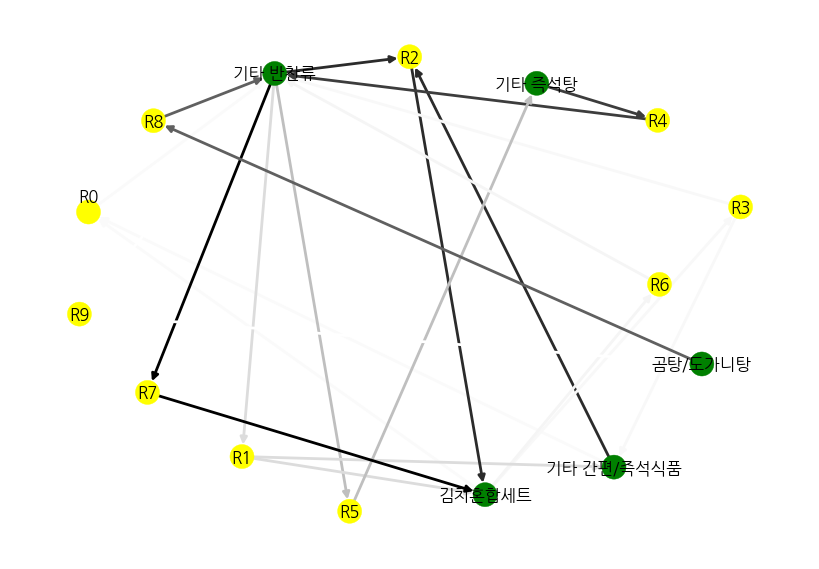

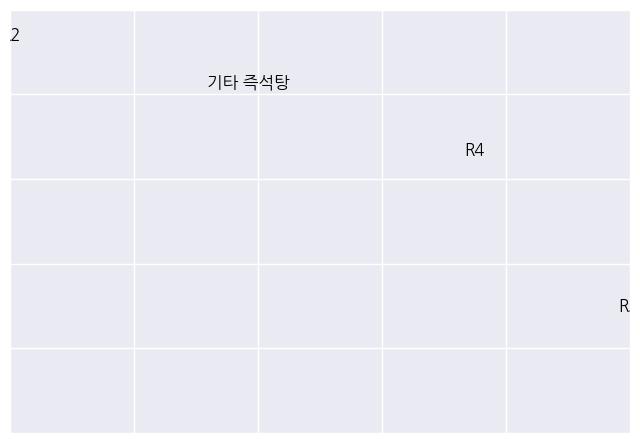

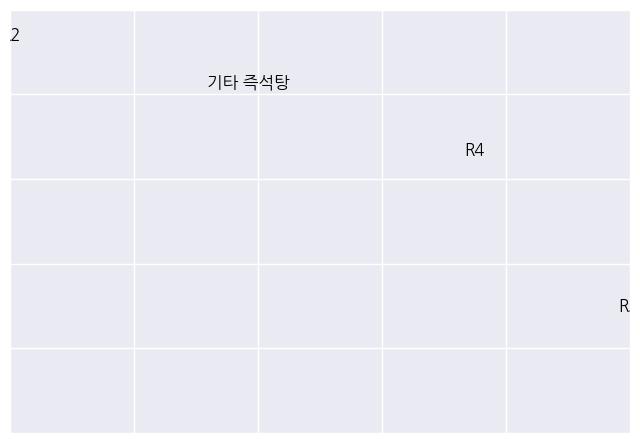

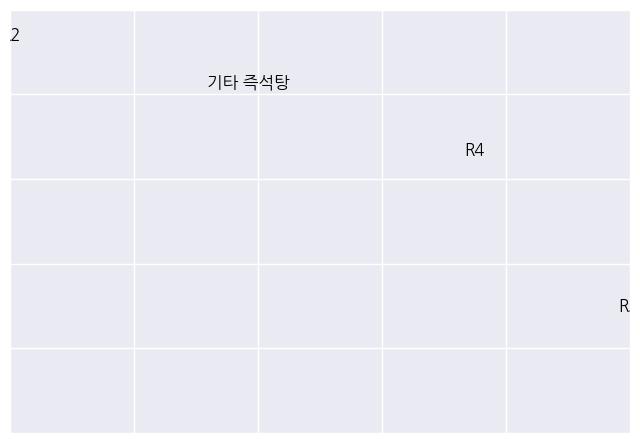

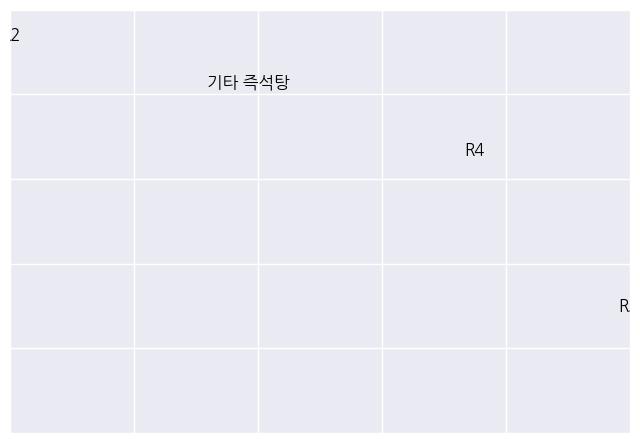

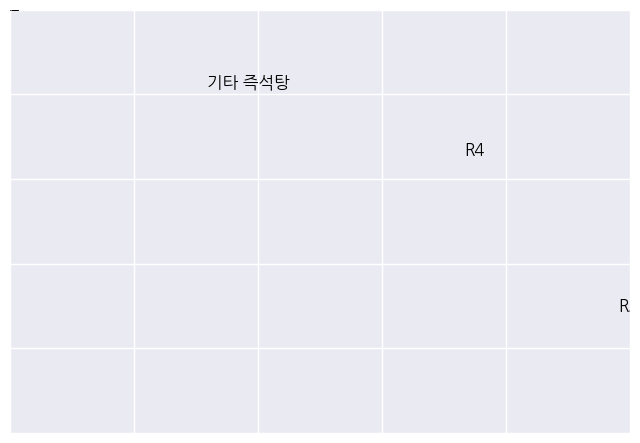

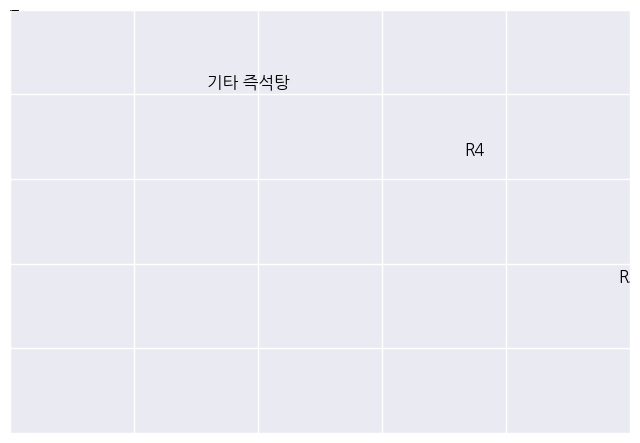

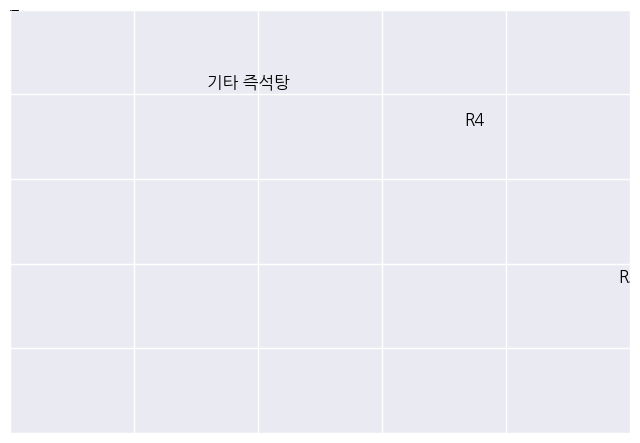

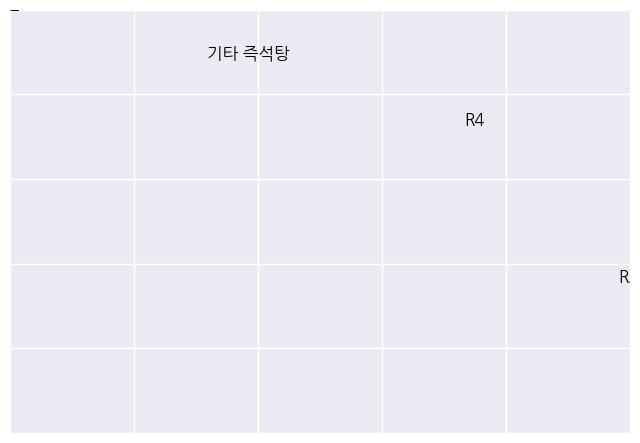

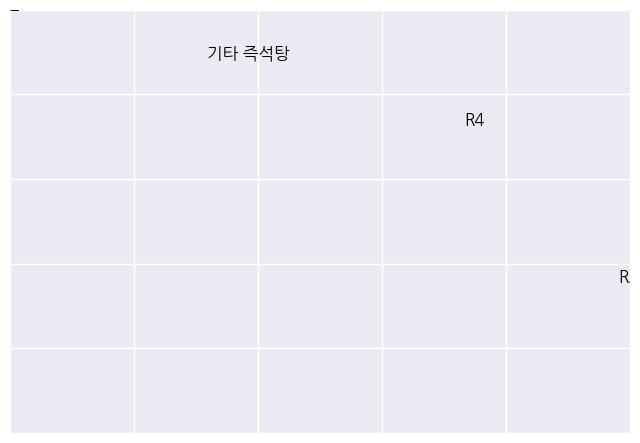

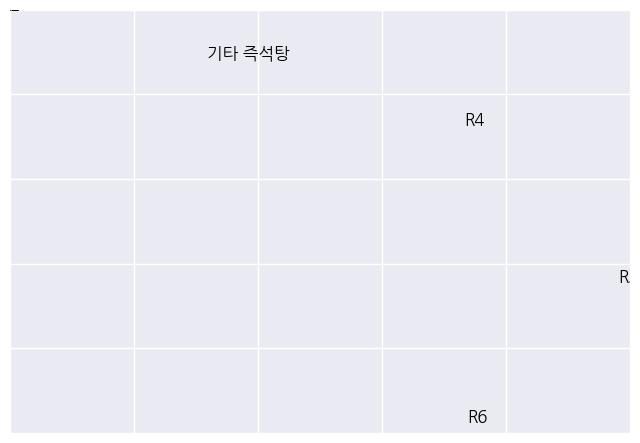

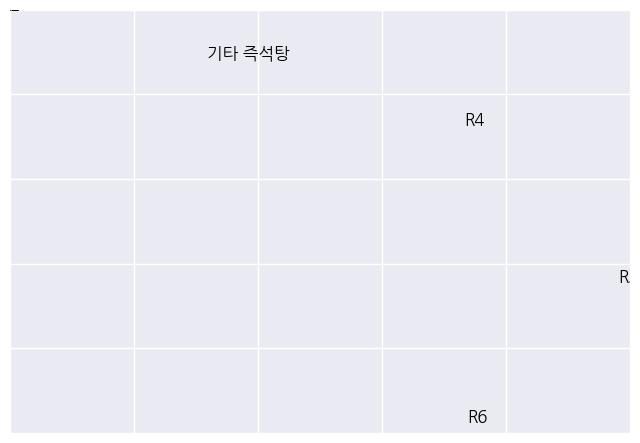

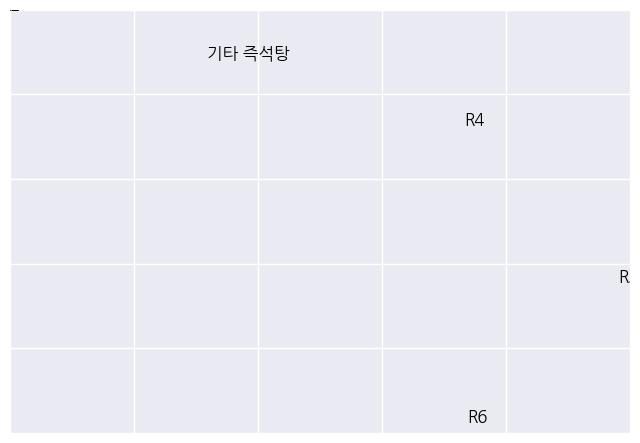

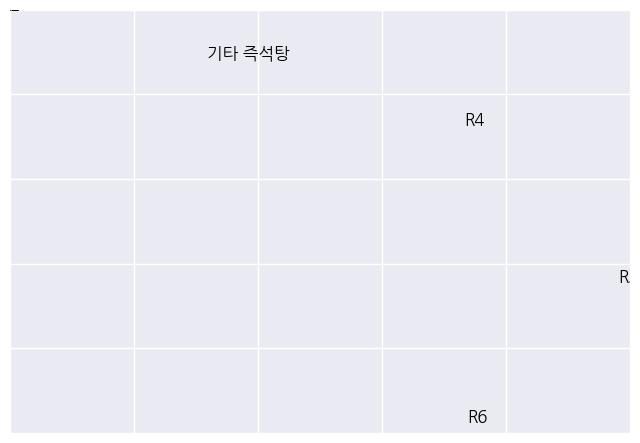

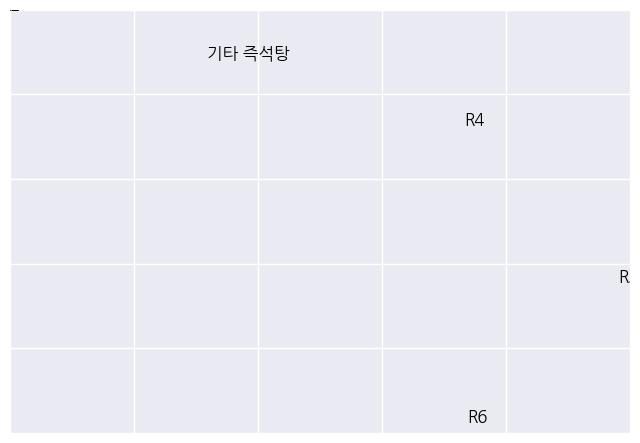

In [ ]:
plt.rc('font', family='NanumGothic')

def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs:
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    plt.close('all')
    plt.figure()
    nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16,
            with_labels=False, font_family='NanumGothic')

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
        nx.draw_networkx_labels(G1, pos, font_family='NanumGothic')
        plt.show()

draw_graph (rules_usual, 10)

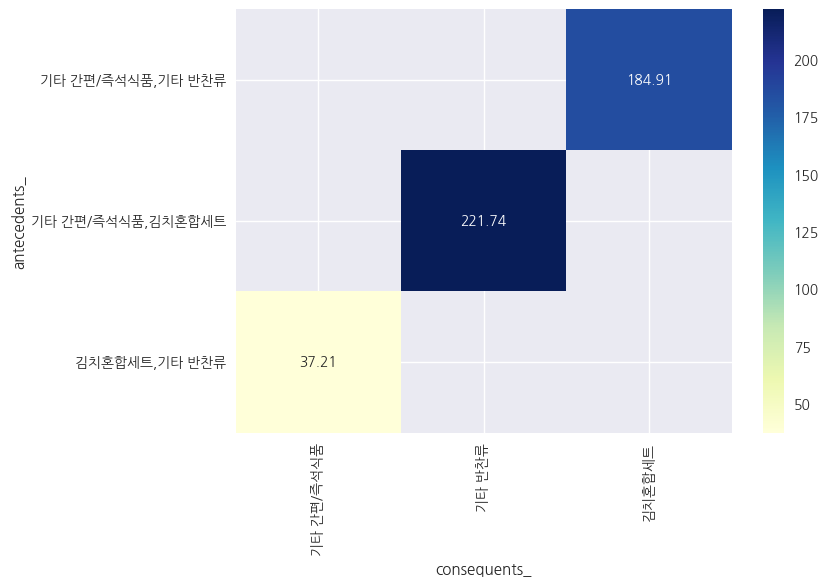

In [ ]:
rules_usual['lhs_items'] = rules_usual['antecedents'].apply(lambda x:len(x) )
rules_usual[rules_usual['lhs_items']>1].sort_values('lift', ascending=False).head()
rules_usual['antecedents_'] = rules_usual['antecedents'].apply(lambda a: ','.join(list(a)))
rules_usual['consequents_'] = rules_usual['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules_usual[rules_usual['lhs_items']>1].pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')
sns.heatmap(pivot, annot = True, fmt=".2f", cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

### 중단가 카테고리 상품의 연관분석
* 향상도 750 이상의 규칙 분석 결과, 중단가 카테고리에서는 콜라겐, 오메가3, 비타민C, 루테인, 유산균, 다이어트, 전기그릴, 기타 건강식품의 중복 구매 확률이 높은 것으로 나타났다.
* 또한, (골드바/코인, 유산균), (골드바/코인, 전기그릴)의 중복 구매 확률도 높게 나타났다.
* 전체 아이템 및 카테고리 기준 연관분석에서 고단가 카테고리 상품의 연관 규칙을 확인할 수 있었기 때문에, 고단가 카테고리 상품의 연관분석은 별도로 실시하지 않았다.

In [ ]:
#여행, 주방가전, 건강식품, 패션잡화
items = ['여행', '주방가전', '건강식품', '패션잡화']
df_asso_mid = df_commerce[df_commerce['item_category'].isin(items)]
df_asso_mid = df_asso_mid[['customer_no', 'item_code', 'item_name']]
df_asso_mid.head(10)

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



,customer_no,item_code,item_name
3,2020075283364,323420069,유산균
5,2016105897736,321409784,캐주얼화
15,2020093742357,321098719,18K쥬얼리
23,2021046071156,323420067,유산균
38,2020029337863,323300065,유산균
45,2020015477511,321279576,루테인
51,2020091115557,323086068,유산균
53,2021018026239,321807371,콜라겐
64,2019123906602,322071419,농축액
68,2020064108156,322407454,오메가3


In [ ]:
# apriori 모델 적용을 위한 품목 리스트 가공
itemset_mid = df_asso_mid.drop_duplicates(
    ['customer_no', 'item_name']).groupby(['customer_no'])['item_name'].apply(list)

itemset_mid = pd.DataFrame(itemset_mid).reset_index().drop(['customer_no'], axis = 'columns')

itemset_mid = itemset_mid.squeeze()

itemset_mid.head()

0    [오메가3]
1     [유산균]
2    [캐주얼화]
3    [앵클부츠]
4    [캐주얼화]
Name: item_name, dtype: object

In [ ]:
# apriori 모델 적용을 위한 장바구니 - 품목 더미 가공

encoder_5 = TransactionEncoder()
encoder_T_5 = encoder.fit(itemset_mid).transform(itemset_mid)

# 데이터프레임으로 변경
itemset_matrix_mid = pd.DataFrame(encoder_T_5, columns=encoder.columns_)

itemset_matrix_mid.head()

,18K쥬얼리,18K쥬얼리세트,2구 이상 전기레인지,IH압력밥솥,LED스탠드,가르시니아,가스그릴,감마리놀렌산,갱년기,건강주스,...,프로틴,프로폴리스,핸드블랜더,홈베이킹,홍삼,홍삼농축액,홍삼톤,환,효소,흑염소즙
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 지지도 0.0005 기준으로 apriori 적용

itemset_apriori_mid = apriori(itemset_matrix_mid, min_support = 0.0005, use_colnames=True)
print(len(itemset_apriori_mid))
itemset_apriori_mid.head(10)

207


,support,itemsets
0,0.001559,(18K쥬얼리세트)
1,0.006443,(IH압력밥솥)
2,0.003741,(갱년기)
3,0.001455,(건강주스)
4,0.006859,(고속블렌더)
5,0.001455,(골드(14/18K))
6,0.042606,(골드바/코인)
7,0.001767,(곶감)
8,0.001974,(글루코사민)
9,0.002494,(기념품)


In [ ]:
# 향상도 1 이상 상품 조합 추출
rules_mid = association_rules(itemset_apriori_mid, metric="lift", min_threshold=1)
rules_mid = rules_mid.sort_values(by = 'lift', ascending = False)
rules_mid.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
559,"(오메가3, 기타 건강식품, 비타민C)","(다이어트, 전기그릴)",0.000831,0.001039,0.000831,1.0,962.3,0.00083,inf,0.999792
492,"(오메가3, 비타민C)","(다이어트, 전기그릴)",0.000831,0.001039,0.000831,1.0,962.3,0.00083,inf,0.999792
759,"(오메가3, 기타 건강식품, 비타민C)","(다이어트, 전기그릴, 콜라겐)",0.000831,0.001039,0.000831,1.0,962.3,0.00083,inf,0.999792
760,"(오메가3, 전기그릴, 비타민C)","(다이어트, 기타 건강식품, 콜라겐)",0.000831,0.001039,0.000831,1.0,962.3,0.00083,inf,0.999792
569,"(오메가3, 비타민C)","(다이어트, 기타 건강식품, 전기그릴)",0.000831,0.001039,0.000831,1.0,962.3,0.00083,inf,0.999792
740,"(오메가3, 기타 건강식품, 콜라겐, 비타민C)","(다이어트, 전기그릴)",0.000831,0.001039,0.000831,1.0,962.3,0.00083,inf,0.999792
728,"(다이어트, 전기그릴)","(오메가3, 콜라겐, 비타민C)",0.001039,0.000831,0.000831,0.8,962.3,0.00083,4.995843,1.000000
769,"(다이어트, 기타 건강식품, 콜라겐)","(오메가3, 전기그릴, 비타민C)",0.001039,0.000831,0.000831,0.8,962.3,0.00083,4.995843,1.000000
770,"(다이어트, 전기그릴, 콜라겐)","(오메가3, 기타 건강식품, 비타민C)",0.001039,0.000831,0.000831,0.8,962.3,0.00083,4.995843,1.000000
720,"(오메가3, 비타민C)","(다이어트, 전기그릴, 콜라겐)",0.000831,0.001039,0.000831,1.0,962.3,0.00083,inf,0.999792


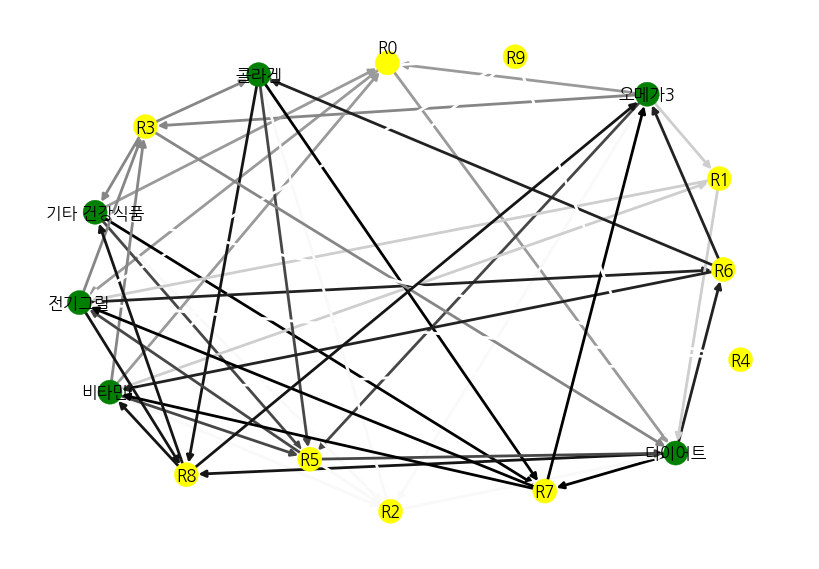

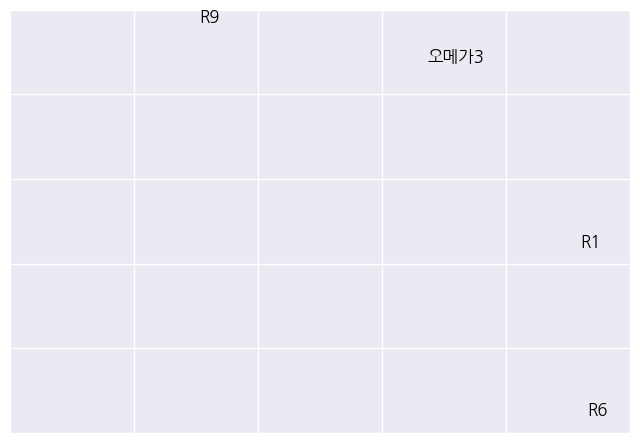

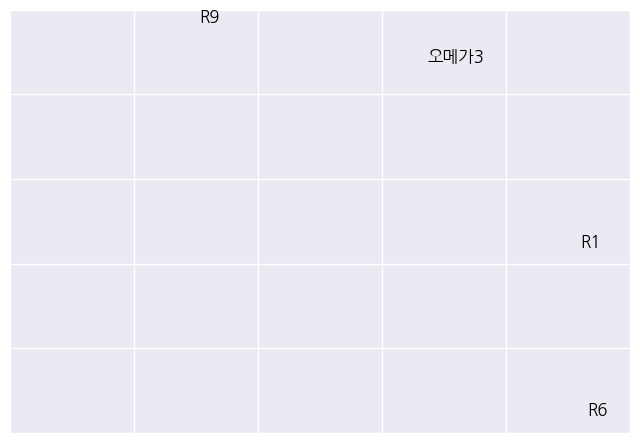

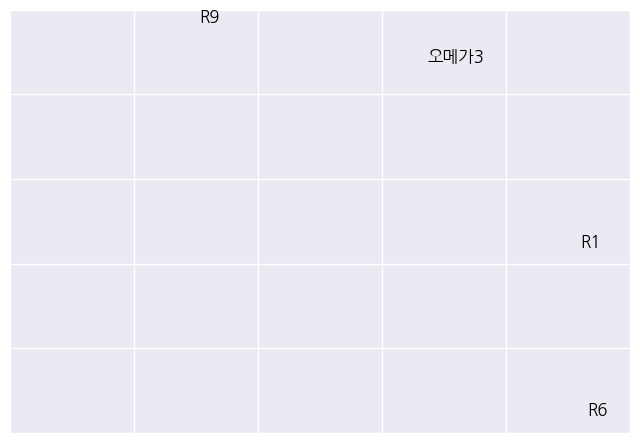

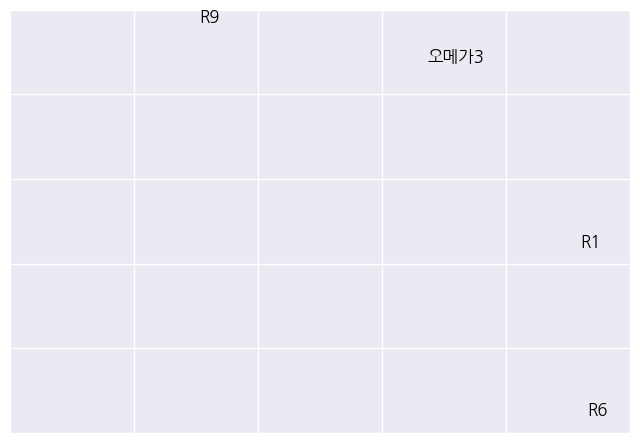

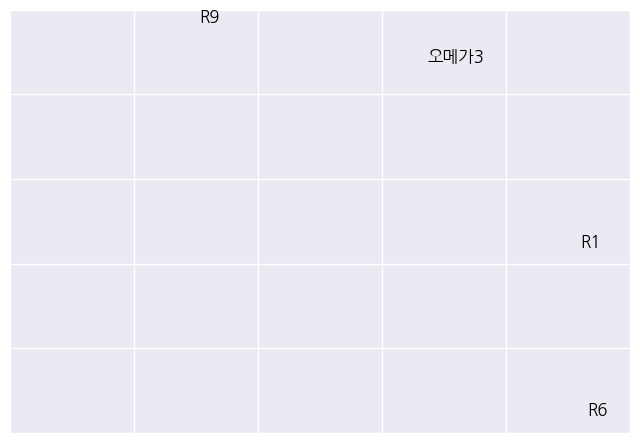

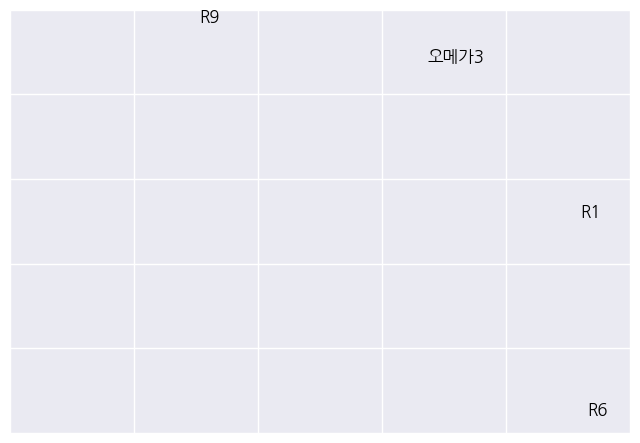

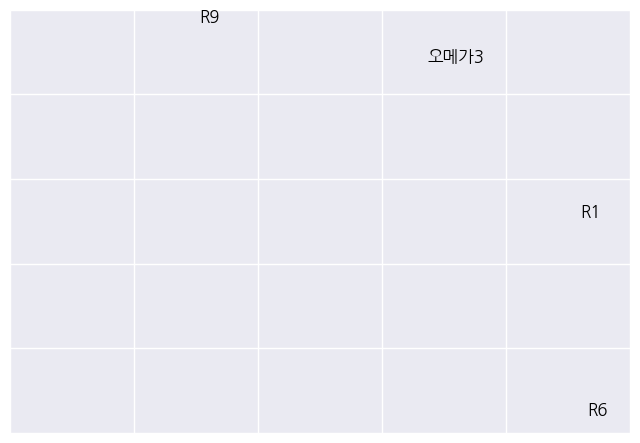

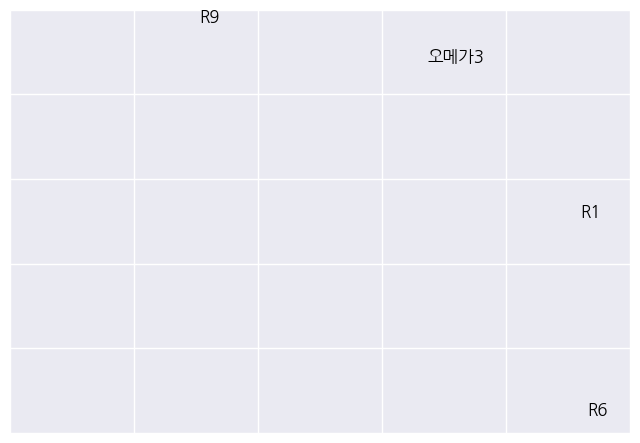

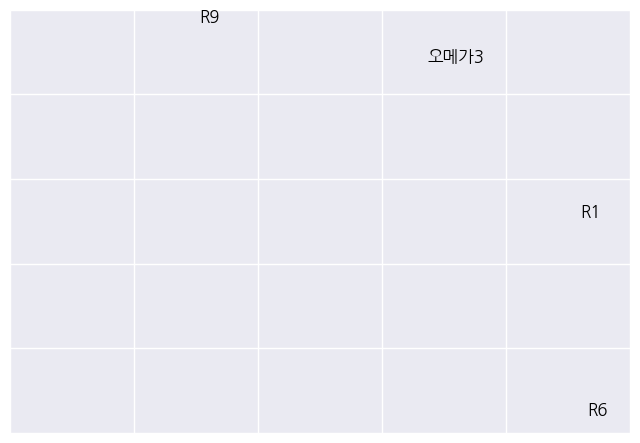

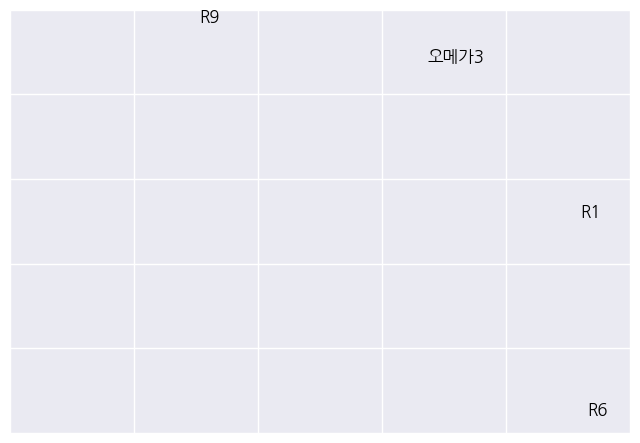

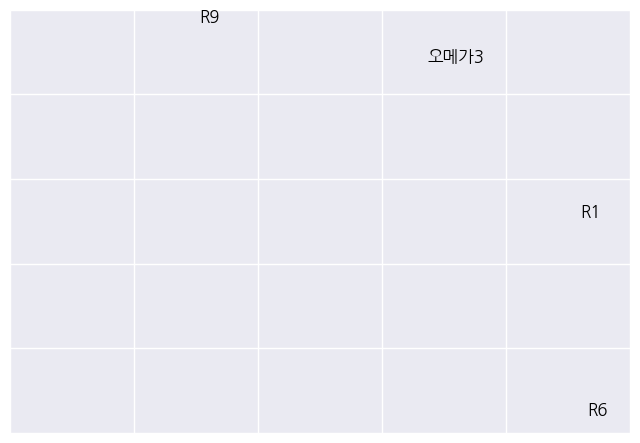

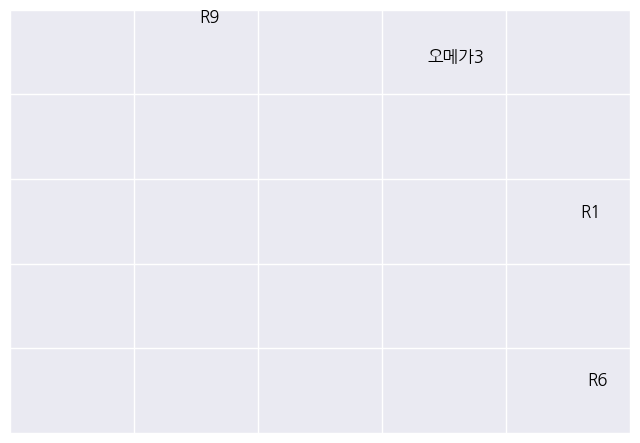

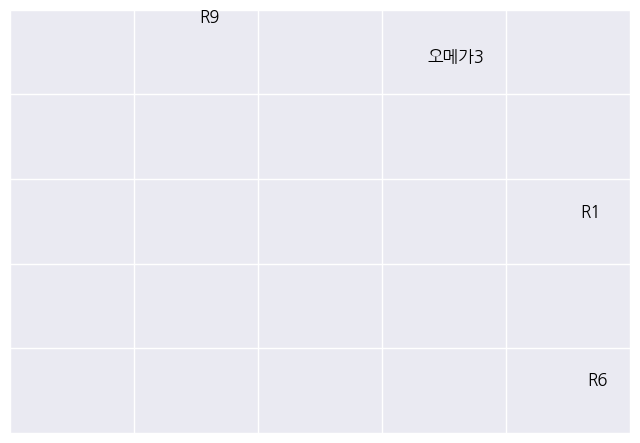

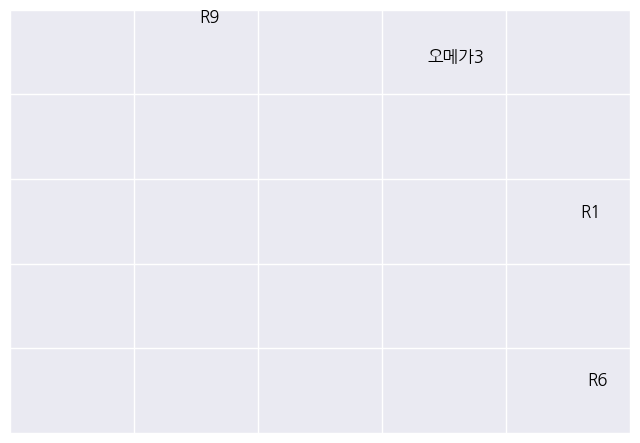

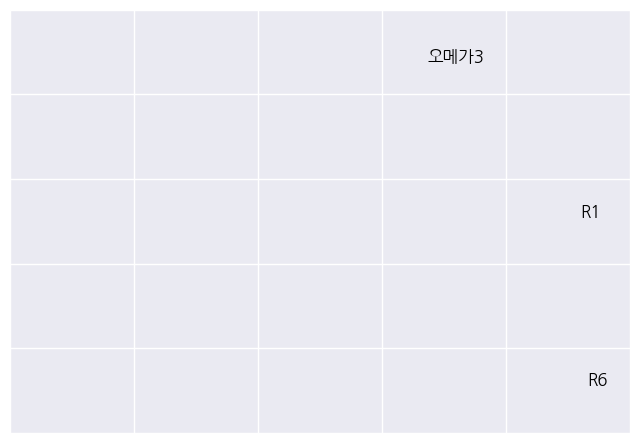

In [ ]:
plt.rc('font', family='NanumGothic')

def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19', 'R20', 'R21', 'R22']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs:
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    plt.close('all')
    plt.figure()
    nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16,
            with_labels=False, font_family='NanumGothic')

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
        nx.draw_networkx_labels(G1, pos, font_family='NanumGothic')
        plt.show()

draw_graph (rules_mid, 10)

In [ ]:
expanded_rows = []

for _, row in rules_mid.iterrows():
    antecedents = row['antecedents']
    consequents = row['consequents']

    for ant in antecedents:
        for con in consequents:
            # 새로운 행을 생성하고 원본 행 데이터 복사
            new_row = row.to_dict()
            new_row['antecedents'] = (ant,)  # 단일 항목 튜플로 세팅
            new_row['consequents'] = (con,)  # 단일 항목 튜플로 세팅
            # 수정된 행을 리스트에 추가
            expanded_rows.append(new_row)

# 확장된 데이터프레임 생성
rules_mid_split = pd.DataFrame(expanded_rows)

#lift 750 이상만 추출
rules_mid_split = rules_mid_split[rules_mid_split['lift'] >= 750]


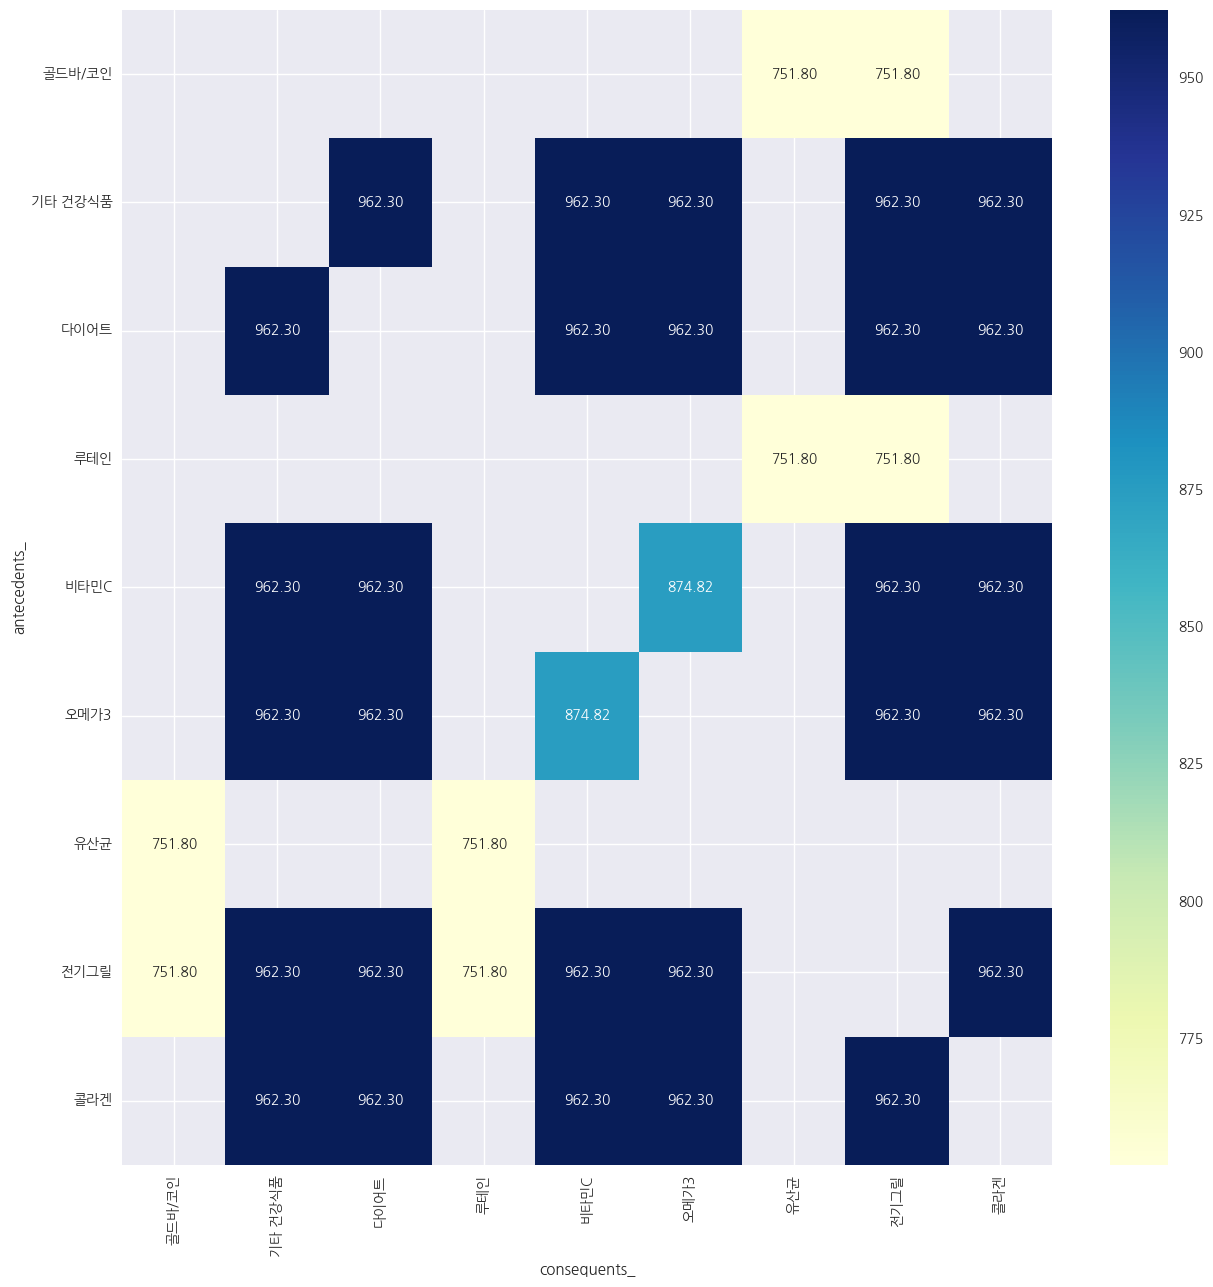

In [ ]:
rules_mid_split['lhs_items'] = rules_mid_split['antecedents'].apply(lambda x:len(x) )
rules_mid_split[rules_mid_split['lhs_items']>=1].sort_values('lift', ascending=False).head()
rules_mid_split['antecedents_'] = rules_mid_split['antecedents'].apply(lambda a: ','.join(list(a)))
rules_mid_split['consequents_'] = rules_mid_split['consequents'].apply(lambda a: ','.join(list(a)))

pivot_table = rules_mid_split[rules_mid_split['lhs_items'] >= 1].pivot_table(
    index='antecedents_',
    columns='consequents_',
    values='lift',
    aggfunc='max'
)

plt.figure(figsize = (15,15))
sns.heatmap(pivot_table, annot = True, fmt=".2f", cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

### 베개 상품의 연관 분석

* 베개의 경우 분석 시점 기준 최근(2021년 6월) 매출이 급등하고 있는 상품으로, 베개 구매자에게 추천할 아이템을 도출하기 위해 베개 구매자의 다른 구매 상품을 기준으로 연관분석을 실시했다.
* lift 기준 상위 규칙 분석 결과, 베개 구매자는 선풍기, 올리브유, 머그잔, 텀블러, 다시마, 식용유, 이지웨어, 브라탑 등의 구매 확률이 높았다.
* 그러나, 베개 상품의 매출액이 높게 나타난 것에는 1구매당 수량 30개 이상의 대량 구매의 영향이 있다.

In [ ]:
pillow_customer = df_commerce[df_commerce['item_name']=='베개']['customer_no'].to_list()

In [ ]:
df_pillow = df_commerce[df_commerce['customer_no'].isin(pillow_customer)]
df_pillow['item_category'].unique()

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



array(['레저/스포츠', '주방가전', '일반식품', '생활용품', '생활가전', '캐쥬얼', '주방용품', '언더웨어',
       '패션잡화', '레포츠패션'], dtype=object)

In [ ]:
# 연관 규칙 분석에 필요한 컬럼만 선택하여 다시 객체 지정하기
df_asso_pillow = df_pillow[['customer_no', 'item_code', 'item_name']]
df_asso_pillow.head()

,customer_no,item_code,item_name
612,2020033154995,323111270,베개
1065,2018117480202,323089248,베개
1072,2021020556109,323089248,베개
1832,2020081600105,323089248,베개
1846,2021018354498,323089248,베개


In [ ]:
# apriori 모델 적용을 위한 품목 리스트 가공
itemset_pillow = df_asso_pillow.drop_duplicates(
    ['customer_no', 'item_name']).groupby(['customer_no'])['item_name'].apply(list)

itemset_pillow = pd.DataFrame(itemset_pillow).reset_index().drop(['customer_no'], axis = 'columns')

itemset_pillow = itemset_pillow.squeeze()

itemset_pillow.head()

0                       [베개]
1    [베개, 이지웨어, 크랩, 팬티, 핸드폰]
2                       [베개]
3                  [숄더백, 베개]
4                       [베개]
Name: item_name, dtype: object

In [ ]:
# apriori 모델 적용을 위한 장바구니 - 품목 더미 가공

encoder_4 = TransactionEncoder()
encoder_T_4 = encoder.fit(itemset_pillow).transform(itemset_pillow)

# 데이터프레임으로 변경
itemset_matrix_pillow = pd.DataFrame(encoder_T_4, columns=encoder.columns_)

itemset_matrix_pillow.head()

,갈비탕,건강주스,기타 간편/즉석식품,다시마,머그잔/텀블러,밴딩팬츠,베개,브라탑패키지,사과,선풍기,...,올리브유,이지웨어,전기그릴,캐쥬얼화,크랩,트랙수트,팬티,피자,핸드폰,황사마스크
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,True,False,True,False,True,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 지지도 0.001 기준으로 apriori 적용

itemset_apriori_pillow = apriori(itemset_matrix_pillow, min_support = 0.001, use_colnames=True)
print(len(itemset_apriori_pillow))
itemset_apriori_pillow.sort_values(by='support', ascending = False).head(10)

119


,support,itemsets
6,1.000,(베개)
0,0.008,(갈비탕)
75,0.008,"(머그잔/텀블러, 올리브유, 식용유)"
87,0.008,"(크랩, 팬티, 이지웨어)"
86,0.008,"(선풍기, 올리브유, 식용유)"
85,0.008,"(핸드폰, 팬티, 베개)"
84,0.008,"(크랩, 핸드폰, 베개)"
83,0.008,"(크랩, 팬티, 베개)"
82,0.008,"(핸드폰, 이지웨어, 베개)"
81,0.008,"(팬티, 이지웨어, 베개)"


In [ ]:
# 향상도 125 이상 상품 조합 추출
rules_pillow = association_rules(itemset_apriori_pillow, metric="lift", min_threshold=125)
rules_pillow = rules_pillow.sort_values(by = 'lift', ascending = False)
rules_pillow

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(머그잔/텀블러),(다시마),0.008,0.008,0.008,1.0,125.0,0.007936,inf,1.0
467,"(베개, 머그잔/텀블러, 올리브유, 다시마)",(선풍기),0.008,0.008,0.008,1.0,125.0,0.007936,inf,1.0
459,"(다시마, 베개)","(선풍기, 머그잔/텀블러, 식용유)",0.008,0.008,0.008,1.0,125.0,0.007936,inf,1.0
460,"(다시마, 식용유)","(선풍기, 머그잔/텀블러, 베개)",0.008,0.008,0.008,1.0,125.0,0.007936,inf,1.0
461,"(식용유, 베개)","(선풍기, 머그잔/텀블러, 다시마)",0.008,0.008,0.008,1.0,125.0,0.007936,inf,1.0
...,...,...,...,...,...,...,...,...,...,...
233,(머그잔/텀블러),"(선풍기, 다시마, 식용유)",0.008,0.008,0.008,1.0,125.0,0.007936,inf,1.0
234,(다시마),"(선풍기, 머그잔/텀블러, 식용유)",0.008,0.008,0.008,1.0,125.0,0.007936,inf,1.0
235,(식용유),"(선풍기, 머그잔/텀블러, 다시마)",0.008,0.008,0.008,1.0,125.0,0.007936,inf,1.0
236,"(선풍기, 머그잔/텀블러, 다시마)",(올리브유),0.008,0.008,0.008,1.0,125.0,0.007936,inf,1.0


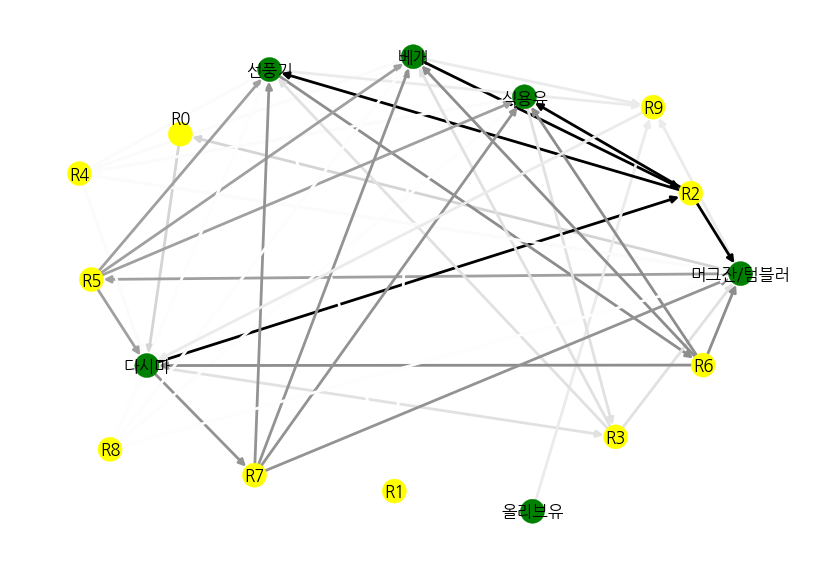

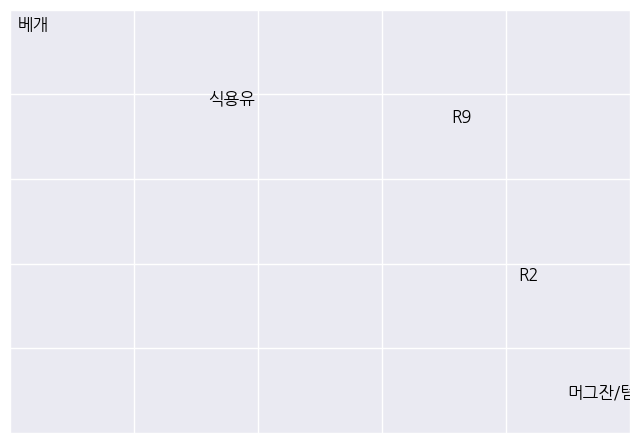

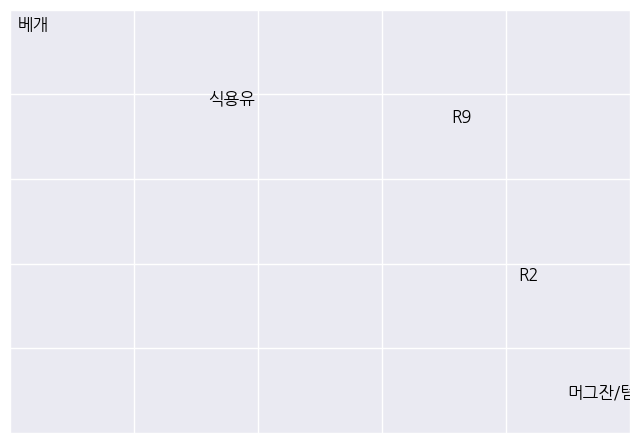

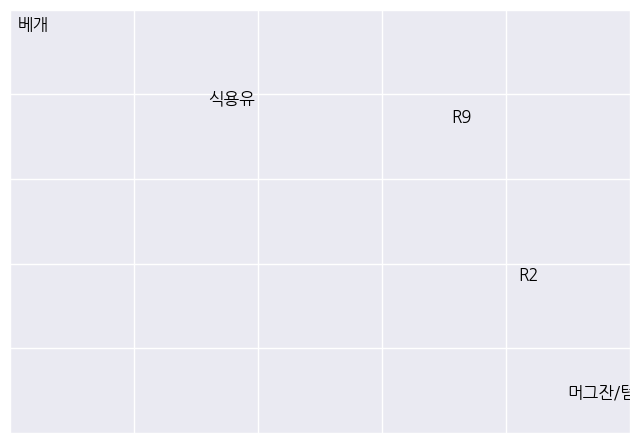

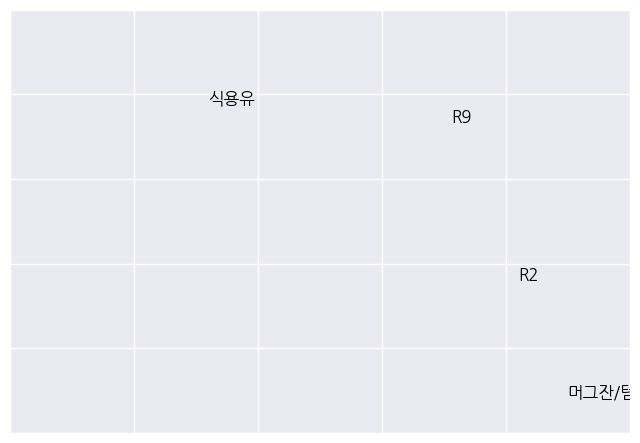

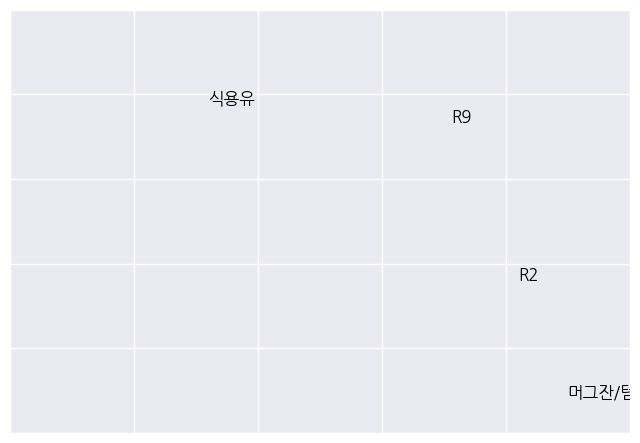

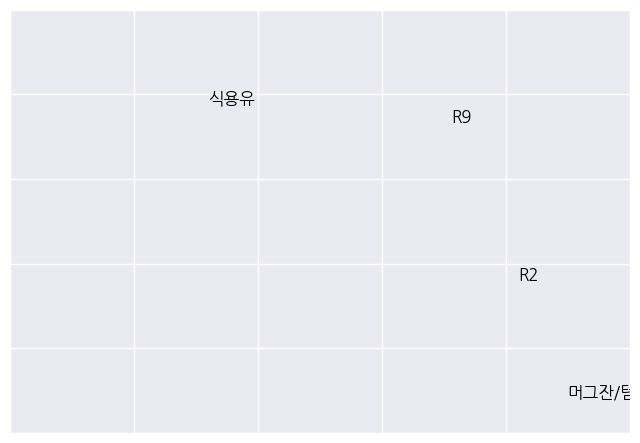

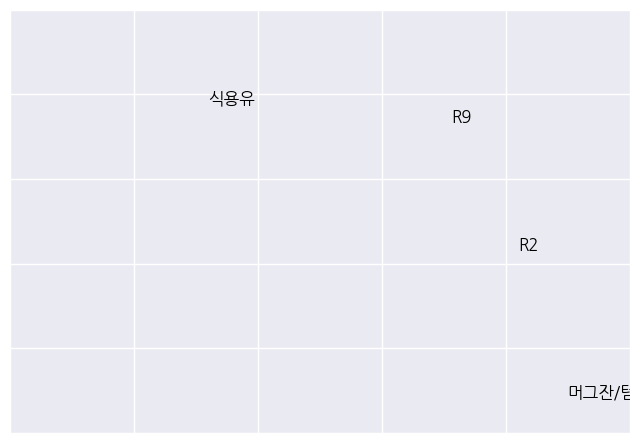

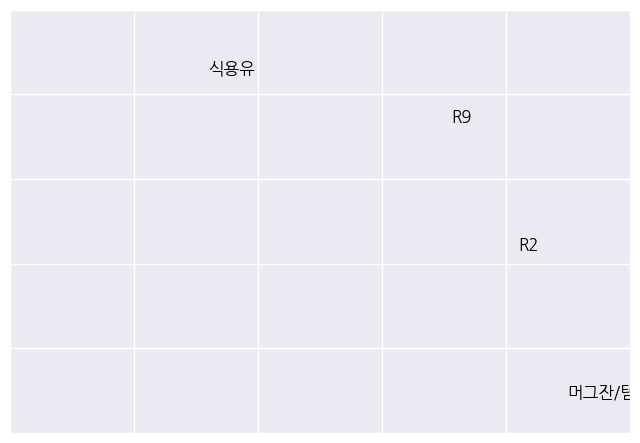

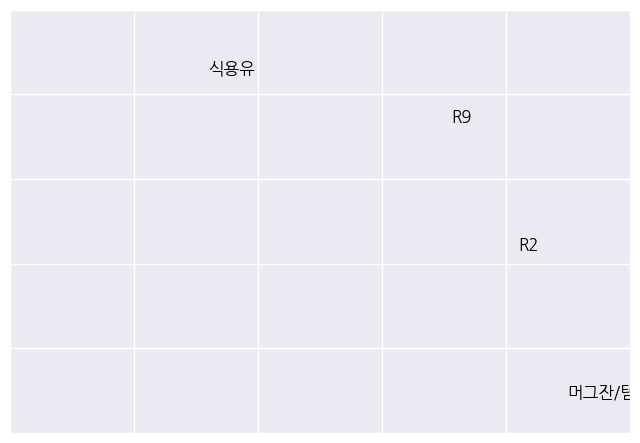

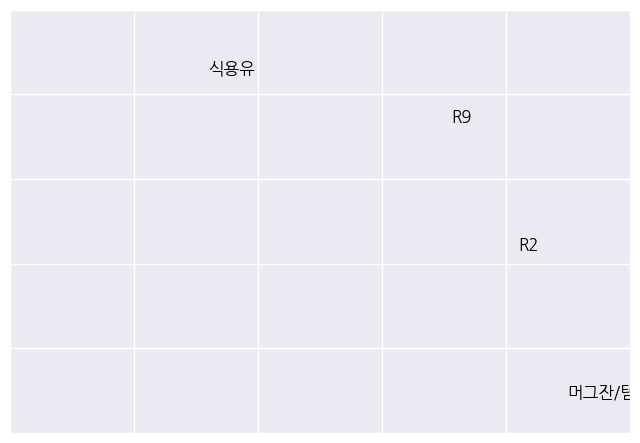

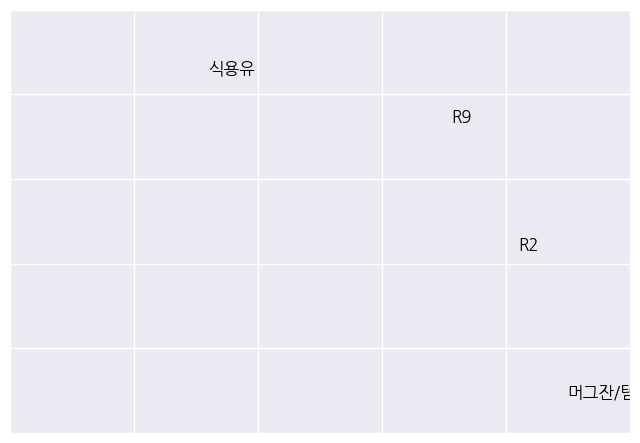

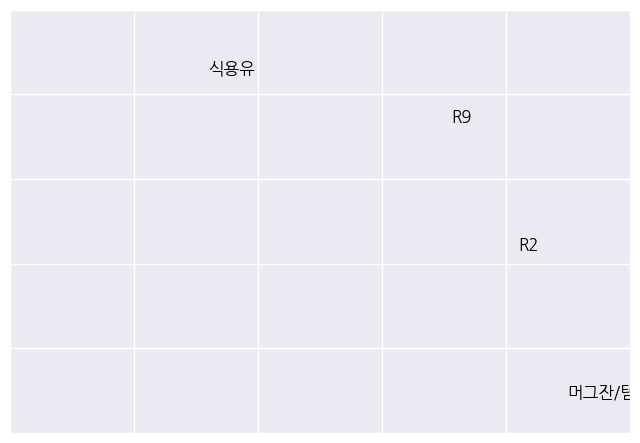

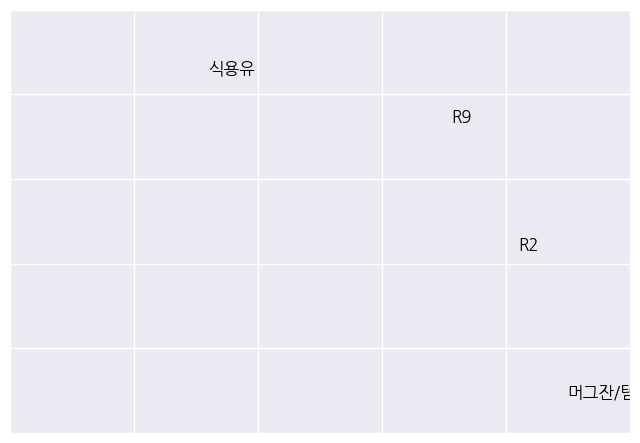

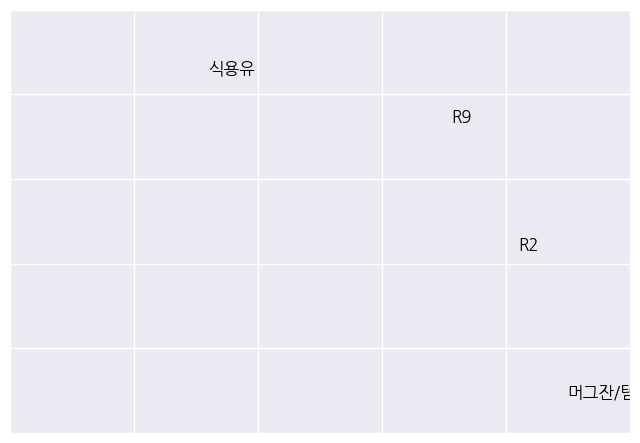

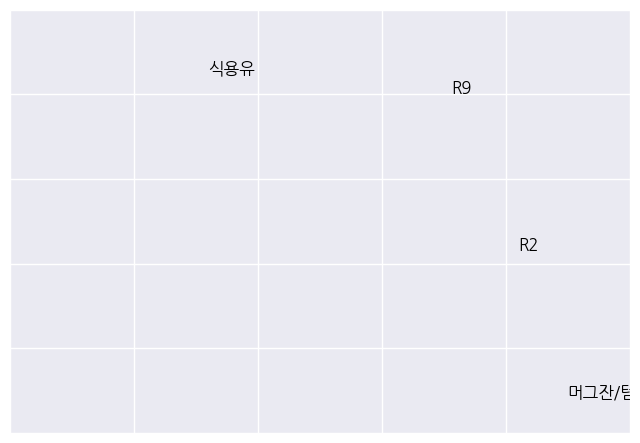

In [ ]:
# 향상도 125로 동률인 행이 많아, 상위 10개만 나타나는 해당 차트는 의미가 없음
plt.rc('font', family='NanumGothic')

def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs:
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    plt.close('all')
    plt.figure()
    nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16,
            with_labels=False, font_family='NanumGothic')

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
        nx.draw_networkx_labels(G1, pos, font_family='NanumGothic')
        plt.show()

draw_graph (rules_pillow, 10)

In [ ]:
expanded_rows = []

for _, row in rules_pillow.iterrows():
    antecedents = row['antecedents']
    consequents = row['consequents']

    for ant in antecedents:
        for con in consequents:
            # 새로운 행을 생성하고 원본 행 데이터 복사
            new_row = row.to_dict()
            new_row['antecedents'] = (ant,)  # 단일 항목 튜플로 세팅
            new_row['consequents'] = (con,)  # 단일 항목 튜플로 세팅
            # 수정된 행을 리스트에 추가
            expanded_rows.append(new_row)

# 확장된 데이터프레임 생성
rules_pillow_split = pd.DataFrame(expanded_rows)

rules_pillow_split.head(10)



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(머그잔/텀블러,)","(다시마,)",0.008,0.008,0.008,1.0,125.0,0.007936,inf,1.0
1,"(베개,)","(선풍기,)",0.008,0.008,0.008,1.0,125.0,0.007936,inf,1.0
2,"(머그잔/텀블러,)","(선풍기,)",0.008,0.008,0.008,1.0,125.0,0.007936,inf,1.0
3,"(올리브유,)","(선풍기,)",0.008,0.008,0.008,1.0,125.0,0.007936,inf,1.0
4,"(다시마,)","(선풍기,)",0.008,0.008,0.008,1.0,125.0,0.007936,inf,1.0
5,"(다시마,)","(선풍기,)",0.008,0.008,0.008,1.0,125.0,0.007936,inf,1.0
6,"(다시마,)","(머그잔/텀블러,)",0.008,0.008,0.008,1.0,125.0,0.007936,inf,1.0
7,"(다시마,)","(식용유,)",0.008,0.008,0.008,1.0,125.0,0.007936,inf,1.0
8,"(베개,)","(선풍기,)",0.008,0.008,0.008,1.0,125.0,0.007936,inf,1.0
9,"(베개,)","(머그잔/텀블러,)",0.008,0.008,0.008,1.0,125.0,0.007936,inf,1.0


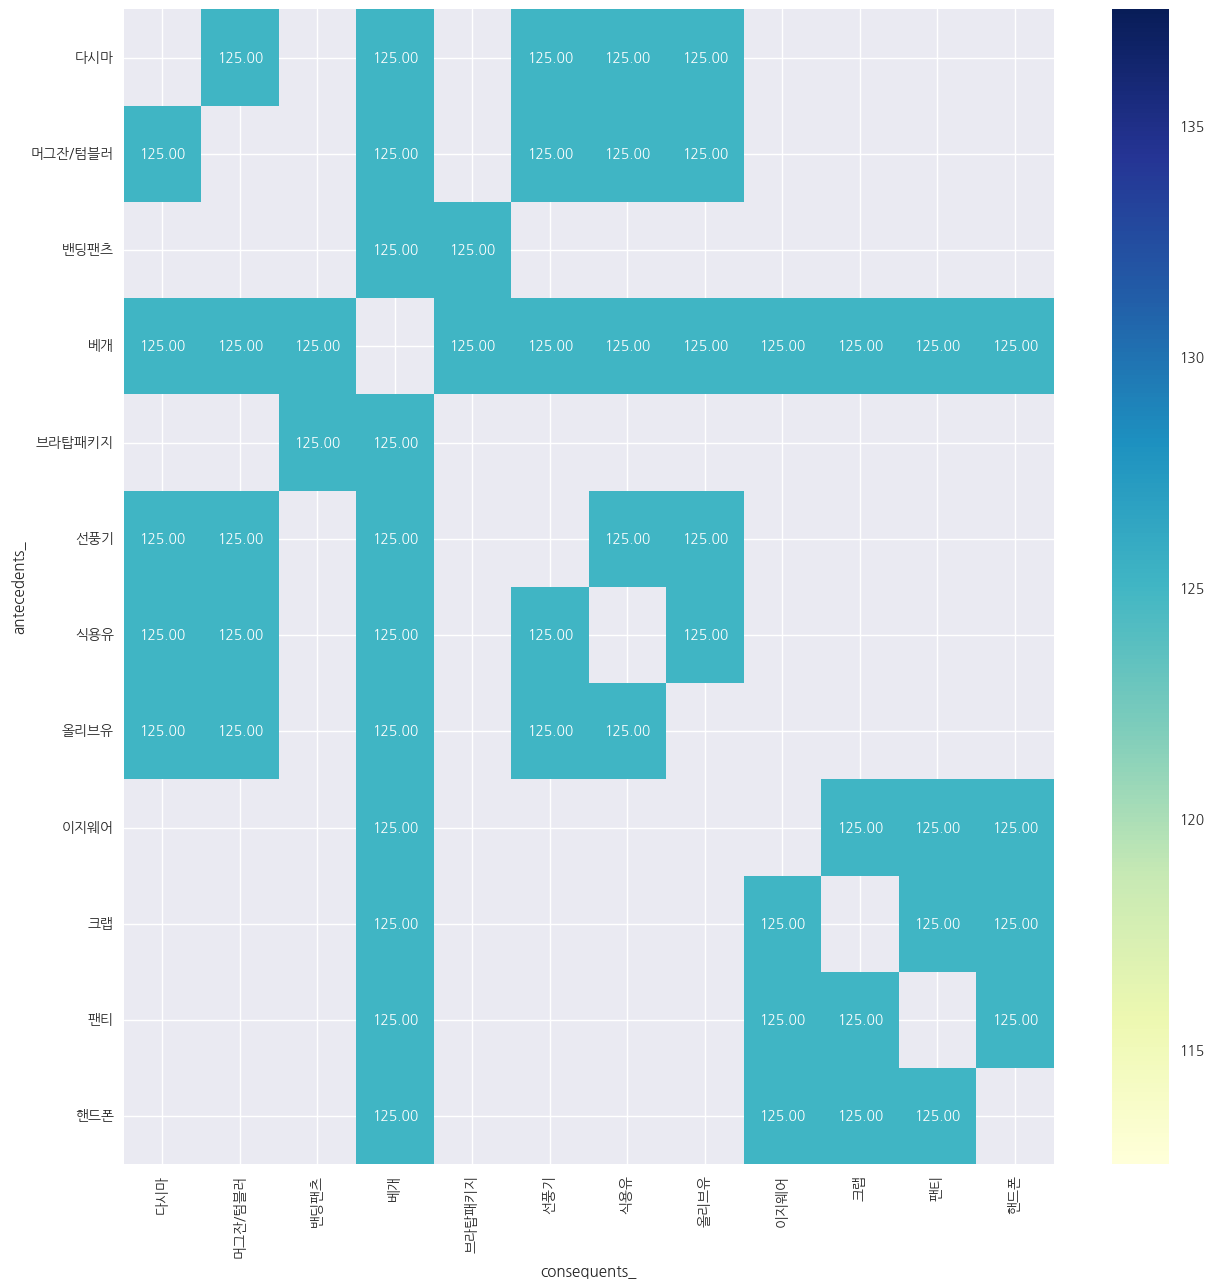

In [ ]:
rules_pillow_split['lhs_items'] = rules_pillow_split['antecedents'].apply(lambda x:len(x) )
rules_pillow_split[rules_pillow_split['lhs_items']>=1].sort_values('lift', ascending=False).head()
rules_pillow_split['antecedents_'] = rules_pillow_split['antecedents'].apply(lambda a: ','.join(list(a)))
rules_pillow_split['consequents_'] = rules_pillow_split['consequents'].apply(lambda a: ','.join(list(a)))

pivot_table = rules_pillow_split[rules_pillow_split['lhs_items'] >= 1].pivot_table(
    index='antecedents_',
    columns='consequents_',
    values='lift',
    aggfunc='max'
)

plt.figure(figsize = (15,15))
sns.heatmap(pivot_table, annot = True, fmt=".2f", cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Pivot 테이블 생성
pivot = rules_pillow_split[rules_pillow_split['lhs_items'] > 1].pivot(
    index='antecedents_', columns='consequents_', values='lift'
)

# NaN 값 처리
pivot = pivot.fillna(0)

# Pivot 테이블에 데이터가 있는지 확인
if pivot.size > 0:
    plt.figure(figsize=(20, 20))
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Pivot 테이블에 유효한 데이터가 없습니다.")


Pivot 테이블에 유효한 데이터가 없습니다.


In [ ]:
# plotly를 이용하여 가독성 높이기
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import networkx as nx

# 그래프 생성
GA = nx.from_pandas_edgelist(rules_pillow_split, source='antecedents', target='consequents', edge_attr=['support', 'confidence', 'lift'])
labels = {node: ', '.join(list(node)) for node in GA.nodes}

# 그래프 레이아웃 생성
pos = nx.spring_layout(GA, k=0.3)

# 그래프 데이터 생성
edge_x = []
edge_y = []
for edge in GA.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
node_text = []
for node in GA.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(labels[node])

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    text=node_text,
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        )
    )
)

# 그래프 레이아웃 설정
layout = go.Layout(
    showlegend=False,
    hovermode='closest',
    margin=dict(b=0, l=0, r=0, t=0),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
)

# 그래프 생성
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter'}]])
fig.add_trace(edge_trace, row=1, col=1)
fig.add_trace(node_trace, row=1, col=1)

# 그래프 출력
fig.update_layout(layout)
fig.show()

In [ ]:
#참고 - 베개 상품 대량 구매자
df_commerce[df_commerce['item_name'] == '베개'].sort_values(by = 'qty', ascending = False).head(20)

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,age_group,order_year_month,join_year_month
19234,2021050694204,68.0,9,202106072477557,2021-06-07,TV,레저/스포츠,323111270,베개,99000,100,9900000,100000,9800000,"[65, 70)",2021-06,2021-05
131500,2021050696387,69.0,9,202106072479741,2021-06-07,TV,레저/스포츠,323111270,베개,99000,100,9900000,1080000,8820000,"[65, 70)",2021-06,2021-05
138922,2021050598696,44.0,9,202106072474485,2021-06-07,TV,레저/스포츠,323111270,베개,99000,100,9900000,100000,9800000,"[40, 45)",2021-06,2021-05
103362,2021050598696,44.0,9,202106100801089,2021-06-10,TV,레저/스포츠,323111270,베개,99000,50,4950000,50000,4900000,"[40, 45)",2021-06,2021-05
51809,2021053950626,26.0,9,202106100804370,2021-06-10,TV,레저/스포츠,323111270,베개,99000,50,4950000,50000,4900000,"[25, 30)",2021-06,2021-05
99477,2021050598696,44.0,9,202105311688356,2021-05-31,TV,레저/스포츠,323111270,베개,99000,50,4950000,540000,4410000,"[40, 45)",2021-05,2021-05
13647,2021050598696,44.0,9,202106112942718,2021-06-11,TV,레저/스포츠,323111270,베개,99000,50,4950000,50000,4900000,"[40, 45)",2021-06,2021-05
105262,2021054734593,67.0,9,202106183607665,2021-06-18,TV,레저/스포츠,323111270,베개,149000,50,7450000,550000,6900000,"[65, 70)",2021-06,2021-05
46173,2021054736709,31.0,9,202106183609148,2021-06-18,TV,레저/스포츠,323111270,베개,149000,50,7450000,550000,6900000,"[30, 35)",2021-06,2021-05
28184,2021053951336,54.0,9,202106100804229,2021-06-10,TV,레저/스포츠,323111270,베개,99000,50,4950000,50000,4900000,"[50, 55)",2021-06,2021-05


## 결론

### cross-selling
* 재구매율이 저단가>중단가>고단가 순으로 나타났으므로, cross-selling 전략은 저단가 제품군에 대해 우선적으로 실시할 필요가 있다.
* 가전(대형가전, 생활가전, 주방가전) 카테고리 상품의 중복 구매 확률이 가장 높게 나타났으므로, 가전 카테고리의 묶음 판매 및 중복 구매 시 할인 정책을 고려해볼 수 있다.
* 중단가/저단가 카테고리에서는 중복구매 확률이 높게 나타난 제품군의 묶음 판매 및 중복 구매 시 할인, 나의 제품 구매 시 연관 상품으로 추천 등의 판매 전략을 고려해볼 수 있다.
   - 중단가 카테고리
      - (콜라겐, 전기그릴, 오메가3, 비타민C, 다이어트, 기타 건강식품)조합
      - (비타민C, 오메가3)조합
      - (루테인, 유산균) 조합
   - 저단가 카테고리
      - (기타반찬류, 기타 간편/즉석식품, 김치혼합세트) 조합
      - (기타 즉석탕, 기타반찬류) 조합
      - (곰탕/도가니탕, 기타 반찬류) 조합
* 최근 매출이 급등하고 있는 베개 제품의 경우, 선풍기, 올리브유, 머그잔, 텀블러, 다시마, 식용유, 이지웨어, 브라탑 제품의 중복 구매 확률이 높게 나타났으므로, 베게 구매자에게 해당 제품을 추천해볼 수 있다.
  - 특히, 목요일/금요일의 TV 판매 시 해당 전략을 고려해야 한다.
  - 베개 제품이 캠핑용 베개일 경우, 캠핑용품 세트를 고려해볼 수 있으며, 일반 베개일 경우 베개 TV 판매 시, 생필품 카테고리를 추천하거나, 베개 판매 방송 후에 생필품 판매 방송을 하여 시청률을 높일 수 있다.
  - 그러나, 베개 상품의 매출액이 높게 나타난 것에는 1구매당 수량 30개 이상의 대량 구매의 영향이 있으므로, 실제 캠페인 집행 전 해당 유저들에 대한 추가 조사가 필요하다.

### EDA
* 상품권, 패션잡화, 키즈/유아동, 생활가전, 주방가전, 뷰티 카테고리의 경우 매출액과 할인금액의 상관계수가 0.8 이상으로, 매출액 증진을 위해 해당 카테고리의 적극적 할인 정책을 고려할 필요가 있다.
* 재구매율이 높은 반려용품, 일반식품, 키즈/유아동 상품군의 경우, 재구매 고객에게 포인트, 쿠폰 등을 제공하여 로열티를 높이고, 고객 리뷰나 사진 등을 활용하여 신뢰성 있는 마케팅 콘텐츠를 제작하여 활용할 수 있다.
* 2018년 이후 회원수는 소폭씩 우상향하고 있으나, 2021년 4월 이후 감소하는 추세에 있어 회원 확보를 위한 정책이 필요하다. (절대적인 회원수가 늘어나야 매출이 늘어나는데 유리하기 때문)
